## INTRODUCTION

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.



## OBJECTIVES

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [408]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # accessing directory structure
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import missingno as mn
import warnings
pd.set_option("display.max_rows", 130, "display.max_columns", 28)
warnings.filterwarnings("ignore")

# Data Inspection of Application Data

In [409]:
# Read the csv file using 'read_csv'.
df=pd.read_csv(r"D:\Upgrad Data Science PGDDS\Python\EDA Case Study\application_data.csv")

In [410]:
#printing first 5 rows of the dataframe to get an idea of values of each variable
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [411]:
#checking the unqiue values in all the columns
df.nunique(axis=0)

SK_ID_CURR                      307511
TARGET                               2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE         

In [412]:
# Check the number of rows and columns in the dataframe
df.shape

(307511, 122)

In [413]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [414]:
# Check the summary for the numeric columns 
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numeric).describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,...,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,...,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,...,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [416]:
#The numbers in the "AMT_INCOME_TOTAL" and "AMT_CREDIT" are too big. Dividing it for a better readability.
df.AMT_INCOME_TOTAL=df.AMT_INCOME_TOTAL.apply(lambda x: x/10000)
df.AMT_CREDIT=df.AMT_CREDIT.apply(lambda x: x/10000)
df.AMT_ANNUITY=df.AMT_ANNUITY.apply(lambda x: x/1000)

**Henceforth we will use the updated values in our further analysis so don't get confused with the units wherever mentioned.

In [417]:
#checking the dataframe
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,20.25,40.65975,24.7005,351000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,27.00,129.35025,35.6985,1129500.0,Family,State servant,Higher education,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,6.75,13.50000,6.7500,135000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,13.50,31.26825,29.6865,297000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,12.15,51.30000,21.8655,513000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,15.75,25.47000,27.5580,225000.0,Unaccompanied,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,7.20,26.95500,12.0015,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,...,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,15.30,67.76640,29.9790,585000.0,Unaccompanied,Working,Higher education,...,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,17.10,37.01070,20.2050,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [418]:
# Cleaning the missing data
# Making a list of all the null values columns having more than 40%

nullcolumns=df.isnull().sum()
nullcolumns=nullcolumns[nullcolumns.values>=(0.4*len(nullcolumns))]
len(nullcolumns)

64

In [419]:
# Removing these 64 columns
nullcolumns = list(nullcolumns[nullcolumns.values>=0.4].index)
df.drop(nullcolumns,axis=1,inplace=True)

In [420]:
#checking the shape of the dataframe after dropping the columns having more than 40% null values
df.shape

(307511, 58)

In [421]:
# Taking the absolute values of the columns which have negative values
df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]]=df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION",
                                                                             "DAYS_ID_PUBLISH"]].abs()

In [422]:
# Checking the columns having null values

df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

###### Here we see that the column "AMT_ANNUITY" is having null values less than 40% but still signficant enough. We will impute the value with mean,median or mode. We need to decide which values to impute with.

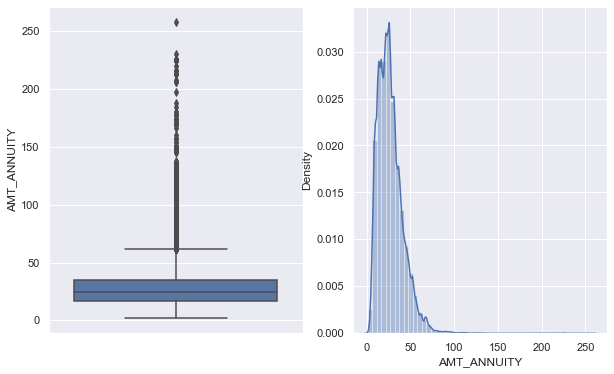

In [423]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(y=df.AMT_ANNUITY)
plt.subplot(1,2,2)
sns.distplot(df.AMT_ANNUITY)
plt.show()

**In the above two plots we see that the variable "AMT_ANNUITY" has outliers and the distribution is also not normal. It is  positively skewed. Hence we can't impute the values with mean. Hence median will be the best choice.**

In [424]:
# Calculating the median of "AMT_ANNUITY" and filling missing values with median

new_value=df['AMT_ANNUITY'].median()
df['AMT_ANNUITY']=df['AMT_ANNUITY'].fillna(new_value)

In [425]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [426]:
#removing unnecessary columns

redundant_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(redundant_cols,axis=1,inplace=True)

In [428]:
#converting the columns into numeric column type
num_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df[num_columns]=df[num_columns].apply(pd.to_numeric)

In [429]:
#Sanity Check: Checking the shape of the cleaned columns
df.shape

(307511, 28)

In [430]:
#checking for any unique values in the cleaned data
rows_new=df.iloc[1:29].values.ravel()
unique_values=pd.unique(rows_new)
print(unique_values)

[100003 0 'Cash loans' 'F' 'N' 27.0 129.35025 35.6985 'State servant'
 'Higher education' 'Married' 'House / apartment' 0.0035409999999999 16765
 1188 1186.0 291 'MONDAY' 11 'School' 100004 'Revolving loans' 'M' 'Y'
 6.75 13.5 'Working' 'Secondary / secondary special'
 'Single / not married' 0.010032 19046 225 4260.0 2531 9 'Government'
 100006 31.26825 29.6865 'Civil marriage' 0.008019 19005 3039 9833.0 2437
 'WEDNESDAY' 17 'Business Entity Type 3' 100007 12.15 51.3 21.8655
 0.028663 19932 3038 4311.0 3458 'THURSDAY' 1 'Religion' 100008 9.9
 49.04955 27.5175 0.035792 16941 1588 4970.0 477 16 'Other' 100009 17.1
 156.0726 41.301 'Commercial associate' 13778 3130 1213.0 619 'SUNDAY'
 100010 36.0 153.0 42.075 0.0031219999999999 18850 449 4597.0 2379 100011
 11.25 101.961 33.8265 'Pensioner' 0.018634 20099 365243 7427.0 3514 14
 'XNA' 100012 40.5 20.25 0.0196889999999999 14469 2019 14437.0 3992 8
 'Electricity' 100014 65.25 21.177 0.0228 10197 679 4427.0 738 'SATURDAY'
 15 'Medicine' 1000

###### We see that there is a XNA Value in the dataframe which was not counted as null. These stand for not available. Hence we need to deal with it as well.

In [431]:
#findng which columns has "XNA" values in them
df.columns[df.isin(['XNA']).any()]

Index(['CODE_GENDER', 'ORGANIZATION_TYPE'], dtype='object')

In [432]:
# finding and examining these categorical columns having 'XNA' values
    
# For Gender column

len(df[df['CODE_GENDER']=='XNA'])

4

In [433]:
# And for Organization column as well

len(df[df['ORGANIZATION_TYPE']=='XNA'])

55374

In [258]:
#calculating the percentage of "XNA" values in the "ORGANIZATION_TYPE" column
len(df[df['ORGANIZATION_TYPE']=='XNA'])/len(df['ORGANIZATION_TYPE'])*100

18.00716071945394

Since the percentage of "XNA" values in the column is considerably a fair amount of percentage, we can't delete the rows which has "XNA" values in it. It would make a difference in our data insights. Hence replacing it with "Unknown".

In [434]:
# Hence, replacing the rows of total 55374 have 'XNA' values in the organization type column to "Unknown" and also checking for the changes

df.ORGANIZATION_TYPE=df.ORGANIZATION_TYPE.replace("XNA","Unknown")

#sanity check
len(df[df['ORGANIZATION_TYPE']=='XNA'])

0

In [435]:
# Describing the Gender column to check the number of females and males

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

If we see the output in the case of 'CODE_GENDER', we see that the data in this column is inclined towards the female group and there is a huge margin between the male and the female value counts. Hence if we add these "XNA" values to the larger lot, it won't make a difference.

In [436]:
# Updating the column 'CODE_GENDER' with "F" for the dataset


df.CODE_GENDER=df.CODE_GENDER.replace("XNA","F")

df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

## Segregating the data according to the target variable

### Calculating the imbalance in the data

In [437]:
#Creating a new datafram which consists of values pertaining to Target variable=0
df_by_target0=df[df.TARGET==0]
print("The total number of people in target variable 0 is:",len(df_by_target0))

The total number of people in target variable 0 is: 282686


In [438]:
#Creating a new datafram which consists of values pertaining to Target variable=1
df_by_target1=df[df.TARGET==1]
print("The total number of people in target variable 1 is:",len(df_by_target1))

The total number of people in target variable 1 is: 24825


**We see that Target variable=1 has less rows than that odd Target Variable=0**

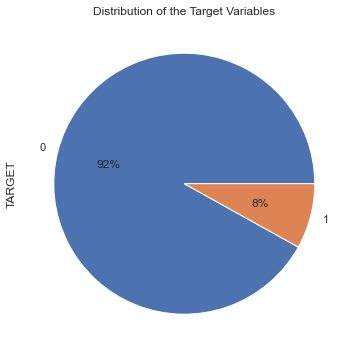

In [439]:
#Pie Chart plotting to show the distribution of the Target Variables
plt.figure(figsize=[10,6])
df['TARGET'].value_counts().plot.pie(autopct="%1.0f%%")
plt.title("Distribution of the Target Variables")
plt.show()

In [265]:
len(df_by_target0)/len(df_by_target1)

11.387150050352467

**The imbalance ratio here is 11.38**

**Inferences:**
   * We see that the majority of people are the clients with  no payment difficulties than the the ones who have late payment issues.


# Univariate Analysis for Target Variable=0

**We see that the values in the columns are varying in their values. Some are very small in comparision to the other ones. Hence a normal scale would not show us the desired results. Hence a logarithmic scale would be used wherever necessary.**

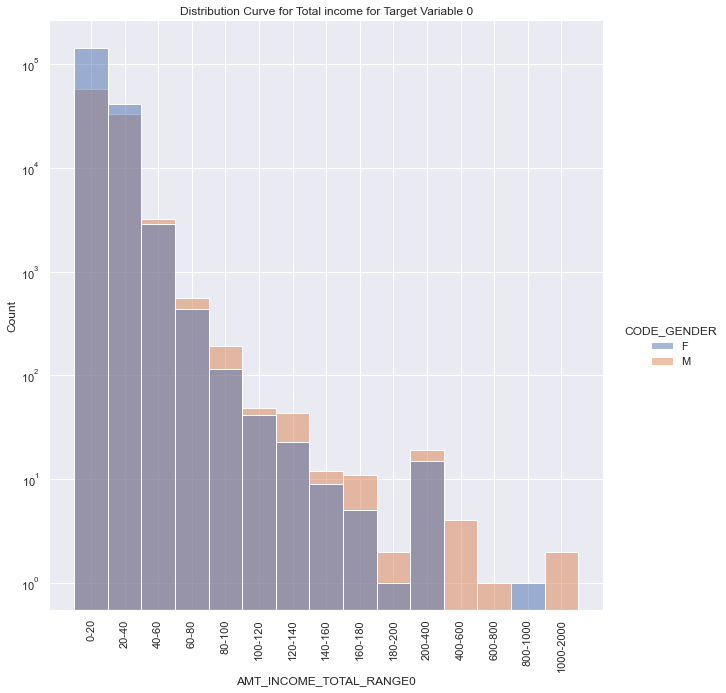

In [440]:
#Plotting a histogram Plot for Total Income for Target Variable 0 in log scale
sns.set_style("darkgrid")
df_by_target0["AMT_INCOME_TOTAL_RANGE0"]=pd.cut(df_by_target0.AMT_INCOME_TOTAL,[0,20,40,60,80,100,120,140,160,180,200,400,600,
                                                                               800,1000,2000],
                                               labels=["0-20","20-40","40-60","60-80","80-100","100-120","120-140",
                                                       "140-160","160-180","180-200","200-400","400-600","600-800","800-1000",
                                                       "1000-2000"])
ax=sns.displot(data=df_by_target0,x="AMT_INCOME_TOTAL_RANGE0",height=9,hue="CODE_GENDER")
plt.title("Distribution Curve for Total income for Target Variable 0")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Inferences Drawn:**
   * The high salary brackets are mostly male.
   * People having salary<40 have a female majority who are paying on time.
   * People having salary>60 have a male majority who are paying on time.
   * After the income goes above 600, the count of people are less.

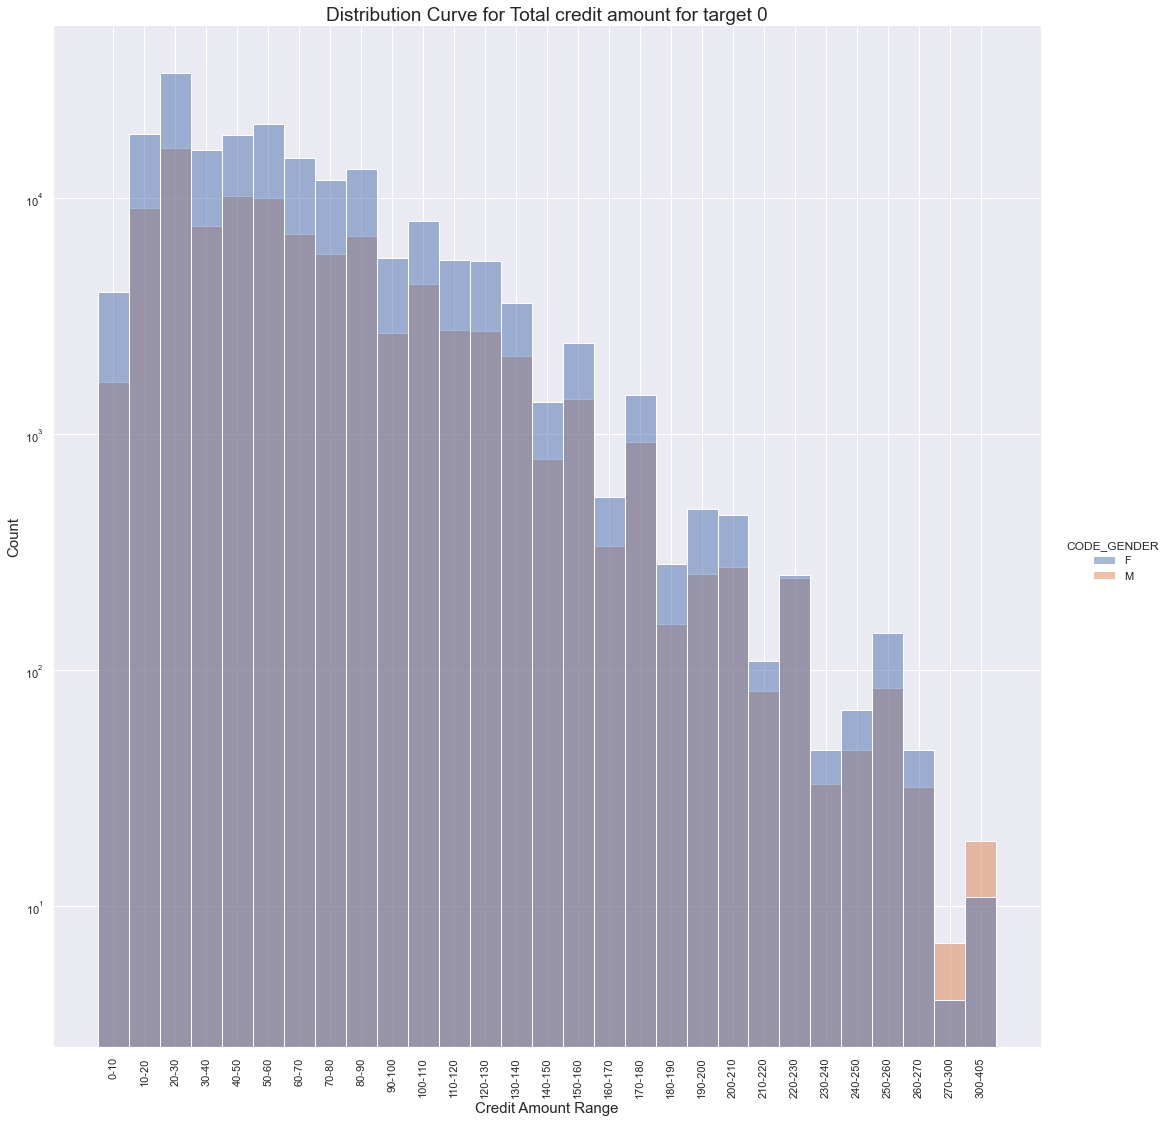

In [446]:
#Plotting Distribution Curve for Total Credit Amount for target variable=0
df_by_target0["AMT_CREDIT_RANGE0"]=pd.cut(df_by_target0.AMT_CREDIT,[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,
                                                                   170,180,190,200,210,220,230,240,250,260,270,300,405],
                                         labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"
                                                 ,"100-110","110-120","120-130","130-140","140-150","150-160","160-170",
                                                 "170-180","180-190","190-200","200-210", "210-220","220-230","230-240",
                                                 "240-250","250-260","260-270","270-300","300-405"])
                                                                                                        

sns.displot(data=df_by_target0,x="AMT_CREDIT_RANGE0",height=15,hue="CODE_GENDER")
plt.title("Distribution Curve for Total credit amount for target 0",fontsize=19)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Credit Amount Range",fontsize=15)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Inferences Drawn:**
   * The females are greater in count than the males in timely payments.
   * Amongst the higher credit range bracket that is above 270, the males are more than female in timely payments.

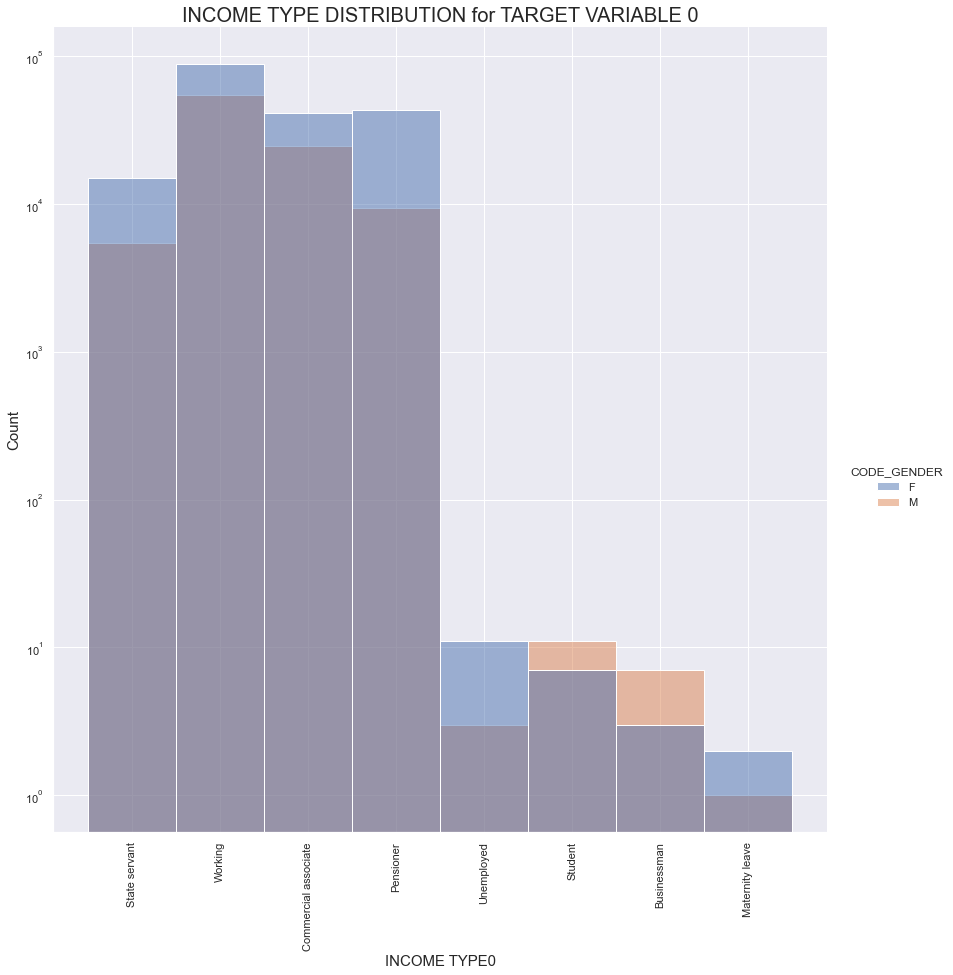

In [448]:
# PLotting a histogram plot for Income Type for target variable=0

sns.displot(data=df_by_target0, x="NAME_INCOME_TYPE",bins=8,height=12,hue="CODE_GENDER")
plt.title('INCOME TYPE DISTRIBUTION for TARGET VARIABLE 0',fontsize=20)
plt.yscale('log')
plt.ylabel('Count',fontsize=15)
plt.xlabel('INCOME TYPE0',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Inference drawn:**
   * The people are higher from "Working","Commercial associate","Pensioner", and "State Servant" income type.
   * Less number of people are from "Maternity Leaves", "Businessman" and "Student".
   * Females are dominant over males in taking loans in "Student" and "Businessman" Income type

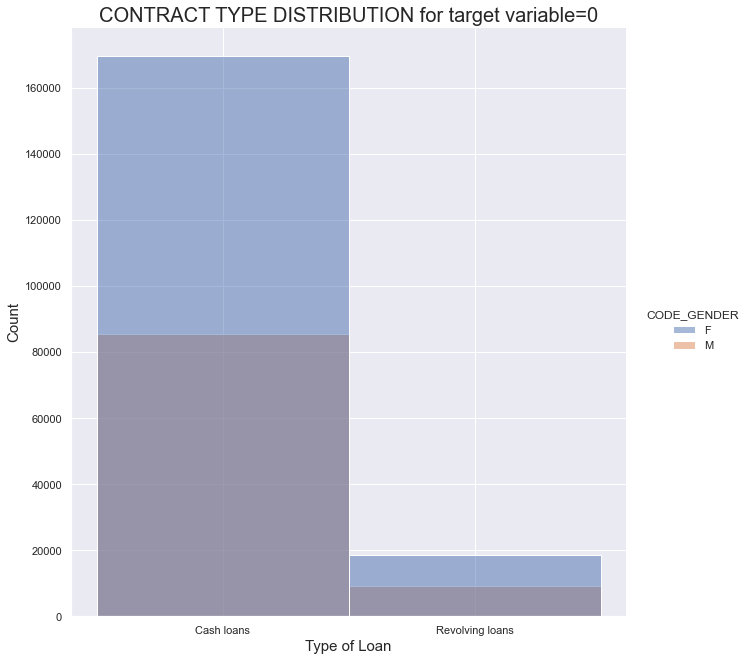

In [450]:
#Plotting a Histogram  plot for contract type variable for target variable=0

sns.displot(data=df_by_target0, x="NAME_CONTRACT_TYPE",bins=2,height=9,hue="CODE_GENDER")
plt.title("CONTRACT TYPE DISTRIBUTION for target variable=0",fontsize=20)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Type of Loan",fontsize=15)
plt.show()

**Inferences Drawn:**
   * Majority of the poeple who don't have late payments are taking cash loans rather than revolving loans. 
   * Female dominates over men in both type of loans.

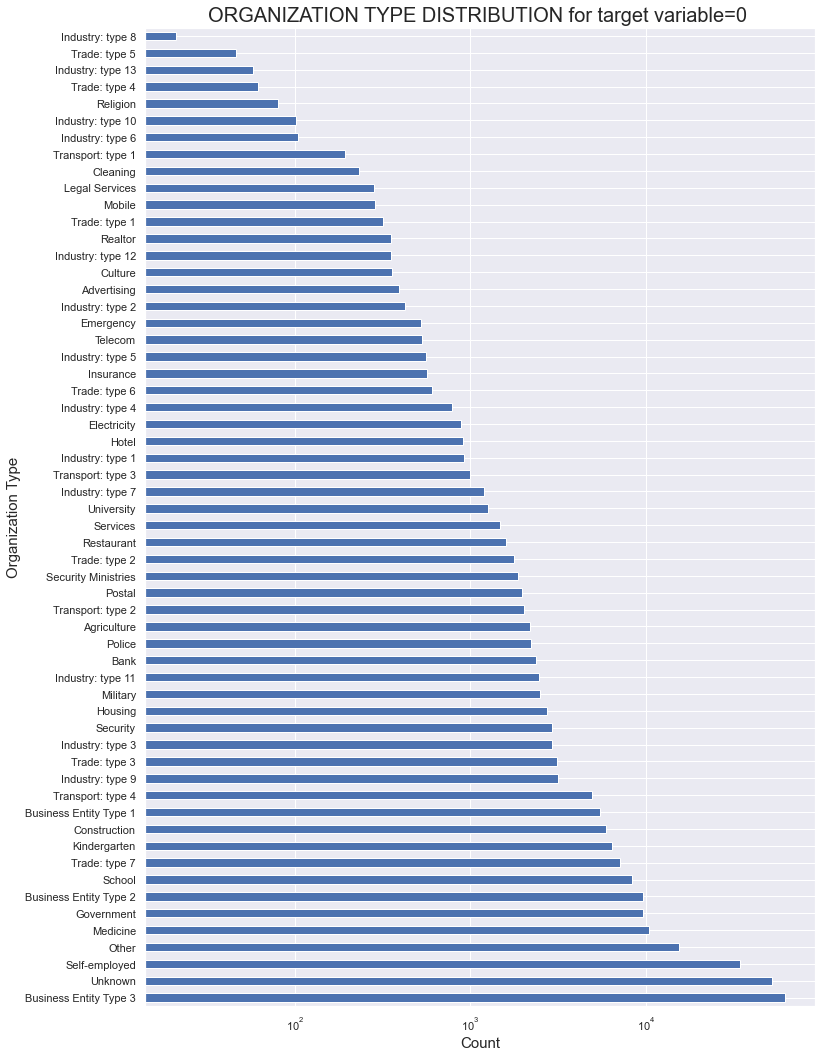

In [454]:
#Plotting a bar plot for Organization Type variable on a log scale for target variable=0
plt.figure(figsize=[12,18])
df_by_target0.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.title("ORGANIZATION TYPE DISTRIBUTION for target variable=0 ",fontsize=20)
plt.xscale('log')
plt.xlabel("Count",fontsize=15)
plt.ylabel("Organization Type",fontsize=15)
plt.show()

**Inferences Drawn:**
   * The people who have paid their loans on time are majorly from Business Type 3, Self-Employed, Other, Medicine and unknown whose data are not mentioned in the data probably because those customers has not filled in this data.
   * There are less customers from Industry type 8,type 10, type 13, religion and trade type 5, type 4.

### Finding Outliers for various numerical columns in df_by_target0 dataframe

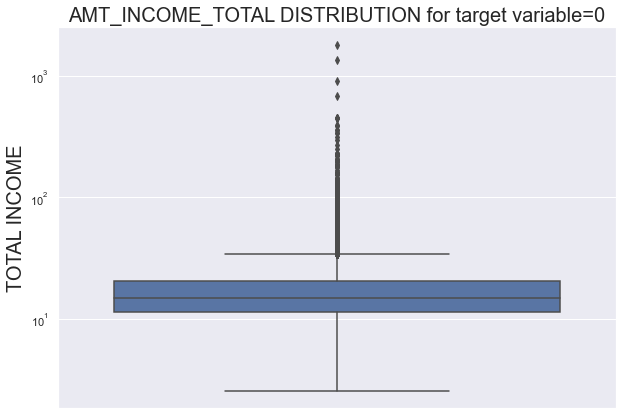

In [455]:
#Distribution of "AMT_INCOME_TOTAL" variable for target variable=0
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target0.AMT_INCOME_TOTAL)
plt.yscale('log')
plt.title('AMT_INCOME_TOTAL DISTRIBUTION for target variable=0',fontsize=20)
plt.ylabel('TOTAL INCOME',fontsize=20)
plt.show()

In [456]:
#printing the IQR of the "AMT_INCOME_TOTAL" variable
lower_quartile=np.percentile(df_by_target0.AMT_INCOME_TOTAL,25)
median_value=np.percentile(df_by_target0.AMT_INCOME_TOTAL,50)
upper_quartile=np.percentile(df_by_target0.AMT_INCOME_TOTAL,75)
print("The lower quartile is",lower_quartile,)
print("The median is",median_value)
print("The upper quartile is",upper_quartile)

The lower quartile is 11.25
The median is 14.85
The upper quartile is 20.25


Inferences Drawn after seeing these 2 plots of "AMT_INCOME_TOTAL" variable:
  * There are considerable outliers present for this column
  * Most of the people who had late payments are having income between 11.25 and 20.25

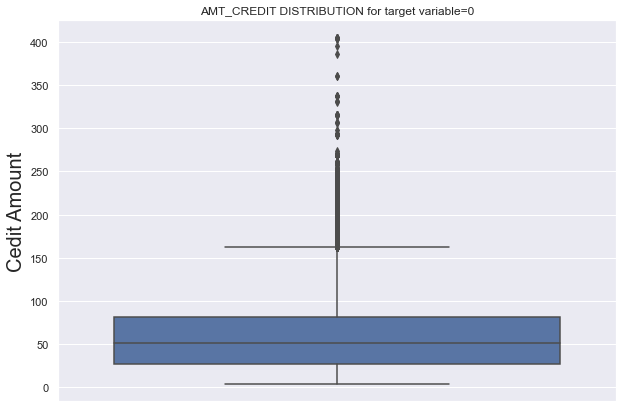

In [458]:
#Distribution of "AMT_CREDIT" variable for target variable=0
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target0.AMT_CREDIT)
plt.ylabel('Cedit Amount',fontsize=20)
plt.title('AMT_CREDIT DISTRIBUTION for target variable=0')
plt.show()

In [459]:
#printing the IQR of the "AMT_CREDIT" variable
print("The lower quartile is",np.percentile(df_by_target0.AMT_CREDIT,25))
print("The median is",np.percentile(df_by_target0.AMT_CREDIT,50))
print("The upper quartile is",np.percentile(df_by_target0.AMT_CREDIT,75)) 


The lower quartile is 27.0
The median is 51.7788
The upper quartile is 81.0


**Inferences Drawn:**
  * There are outliers in the "AMT_CREDIT" column.
  * The third quartile is wider than the first quartile indicating that most of the values are in the third quartile.
  * 75% of the people who had late payments have credits less than 81.

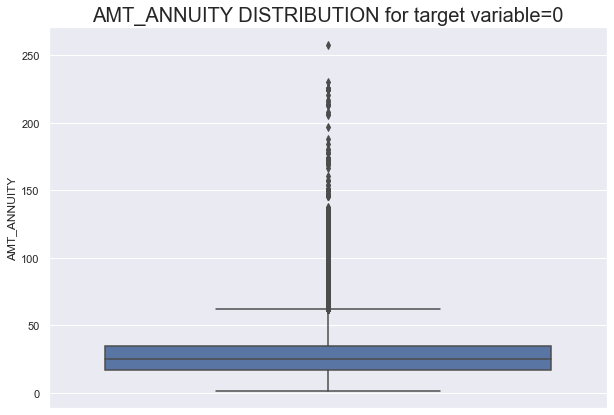

In [461]:
#Distribution of "AMT_ANNUITY" variable for target variable=0
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target0.AMT_ANNUITY)
plt.title('AMT_ANNUITY DISTRIBUTION for target variable=0',fontsize=20)
plt.show()

In [276]:
#printing the IQR of the "AMT_ANNUITY" variable
print("The lower quartile is",np.percentile(df_by_target0.AMT_ANNUITY,25))
print("The median is",np.percentile(df_by_target0.AMT_ANNUITY,50))
print("The upper quartile is",np.percentile(df_by_target0.AMT_ANNUITY,75)) 

The lower quartile is 16.4565
The median is 24.876
The upper quartile is 34.749


Inferences Drawn:
  * There are outliers present in this column.
  * 75% of the people who had late payments have annuity less than or equal to 34.79K
  * A good amount of people have high annuity amount.

# Univariate Analysis for Target Variable=1

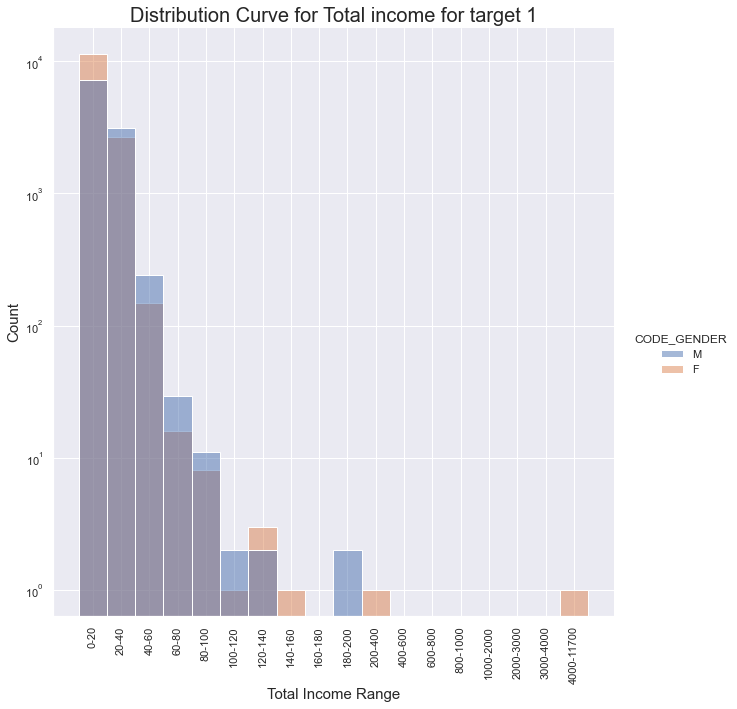

In [462]:
#Plotting Total Income Distribution Graph for target Variable=1 after binning the variable

df_by_target1["AMT_INCOME_TOTAL_RANGE1"]=pd.cut(df_by_target1.AMT_INCOME_TOTAL,[0,20,40,60,80,100,120,140,160,180,200,400,600,
                                                                               800,1000,2000,3000,4000,11700],
                                               labels=["0-20","20-40","40-60","60-80","80-100","100-120","120-140",
                                                       "140-160","160-180","180-200","200-400","400-600","600-800","800-1000",
                                                       "1000-2000","2000-3000","3000-4000","4000-11700"])
sns.displot(data=df_by_target1,x="AMT_INCOME_TOTAL_RANGE1",height=9,hue="CODE_GENDER")
plt.title("Distribution Curve for Total income for target 1",fontsize=20)
plt.xlabel("Total Income Range",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Inferences Drawn:**
   * Males Count is greater than female amongst those people who have delayed payments.
   * The count is less for salary>60. In that part males are more.
   * More of females having salary<20 are having late payment problems.

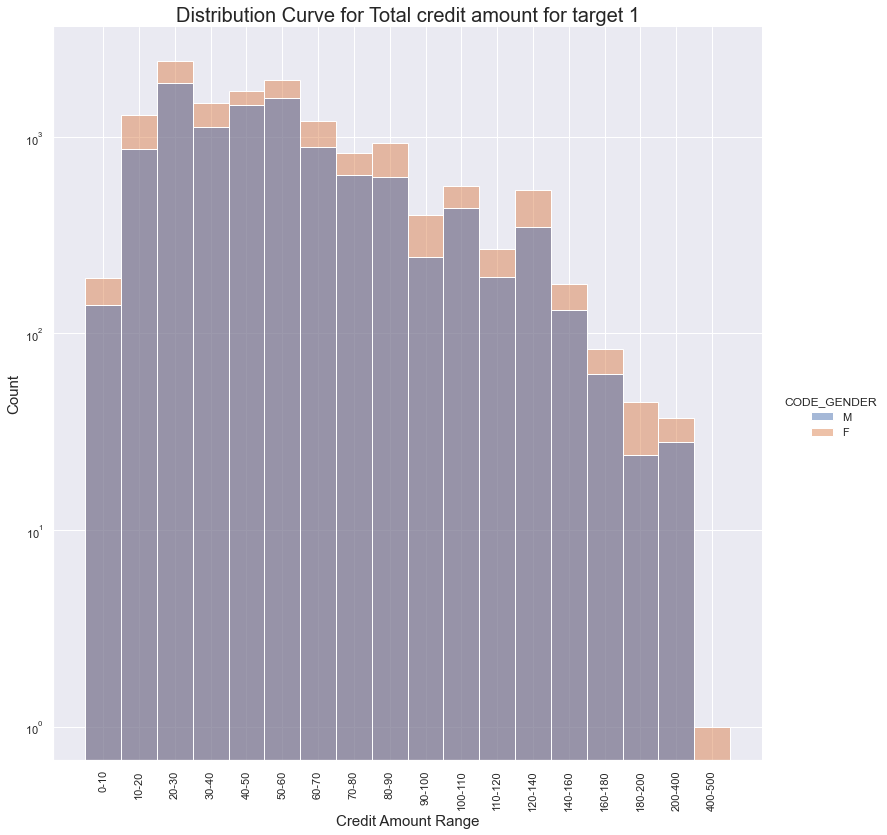

In [470]:
#Plotting Distribution Curve for Total Credit Amount for target variable=1
df_by_target1["AMT_CREDIT_RANGE1"]=pd.cut(df_by_target1.AMT_CREDIT,[0,10,20,30,40,50,60,70,80,90,100,110,120,140,160,180,
                                                                         200,400,500],
                                         labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90","90-100"
                                                 ,"100-110","110-120","120-140","140-160","160-180","180-200","200-400",
                                                 "400-500"])

sns.displot(data=df_by_target1,x="AMT_CREDIT_RANGE1",height=11,hue="CODE_GENDER")
plt.title("Distribution Curve for Total credit amount for target 1",fontsize=20)
plt.xlabel("Credit Amount Range",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Inference Drawn:**
   * The delayed payments is the highest amongst the people who have taken a credit loan from the bracket 20-30 followed by 50-60 bracket.
   * Females are predominantly more in this segment.

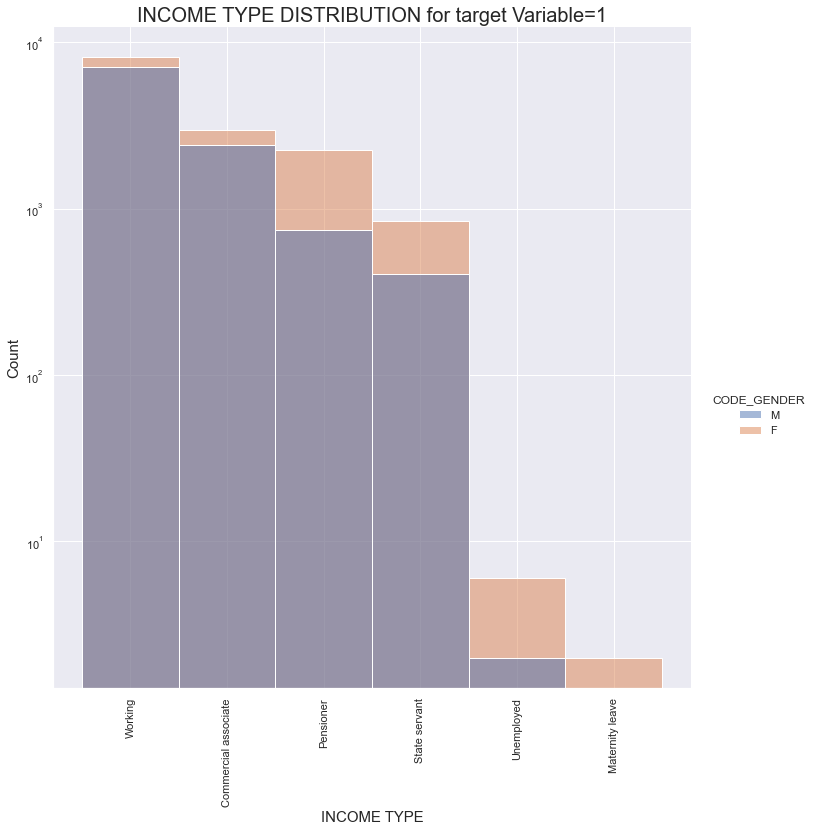

In [471]:
#Plotting Income Type Distribution Graph for target Variable=1

sns.displot(data=df_by_target1, x="NAME_INCOME_TYPE",bins=6,height=10,hue="CODE_GENDER")
plt.yscale('log')
plt.title('INCOME TYPE DISTRIBUTION for target Variable=1',fontsize=20)
plt.ylabel('Count',fontsize=15)
plt.xlabel('INCOME TYPE',fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Inferences Drawn:**
   * We see that the Working, Commercial Associate, Pensioner are higher than the Maternity and the Unemployed Columns.
   * "Students" and "Businessman" categories are not available which means that that these categories of people are paying their loans on time. **Hence loan to such categories of people would be apt.**
   * We see that the females are higher in number than males in taking loans and in all income types.

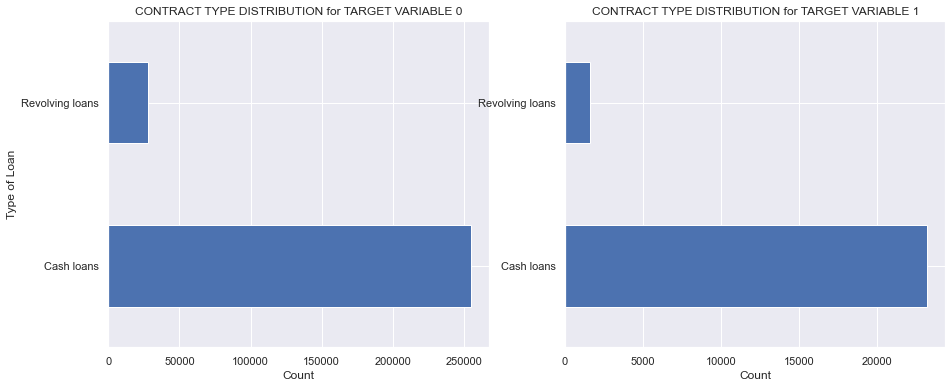

In [472]:
#Plotting Contract Type Distribution Graph and comparing it with that of the 0 target variable.
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
df_by_target0.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.title("CONTRACT TYPE DISTRIBUTION for TARGET VARIABLE 0")
plt.xlabel("Count")
plt.ylabel("Type of Loan")
plt.subplot(1,2,2)
df_by_target1.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.title("CONTRACT TYPE DISTRIBUTION for TARGET VARIABLE 1")
plt.xlabel("Count")
plt.show()

**Inferences Drawn:**
   * Here also, people who have made late payments are mostly taking cash loans more than revolving loans.
   * When we compare the above 2 graphs, we see that the no of people who have taken revolving loans and cash loans is more with the people who have paid their payments on time than the late payments people.

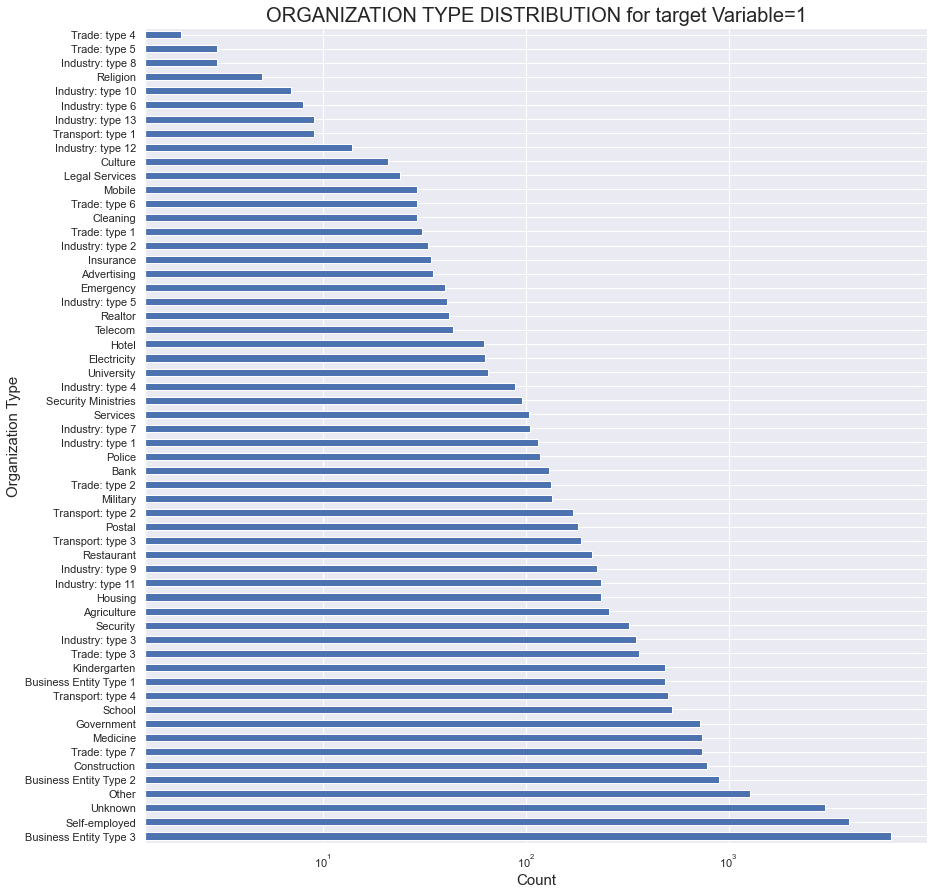

In [469]:
#Plotting Organization Type Distribution Graph for target Variable=1
plt.figure(figsize=[14,15])
df_by_target1.ORGANIZATION_TYPE.value_counts().plot.barh()
plt.title("ORGANIZATION TYPE DISTRIBUTION for target Variable=1",fontsize=20)
plt.xscale('log')
plt.xlabel("Count",fontsize=15)
plt.ylabel("Organization Type",fontsize=15)
plt.show()

**Inferences Drawn:**
   * The people who have a history of late payments are frequently from Business Entity: Type 3, Self-Employed, Other, Unknown and Business Entity:Type 2.
   * The people in the Business Entity: Type 3, Self-Employed are < (10^4) in late payments but > (10^4) in timely payments. So a majority of the people in these groups pay on time than make late payments.
   * It's more or less same like Target Variable 0.

### Finding Outliers for various numerical columns in df_by_target1 dataframe

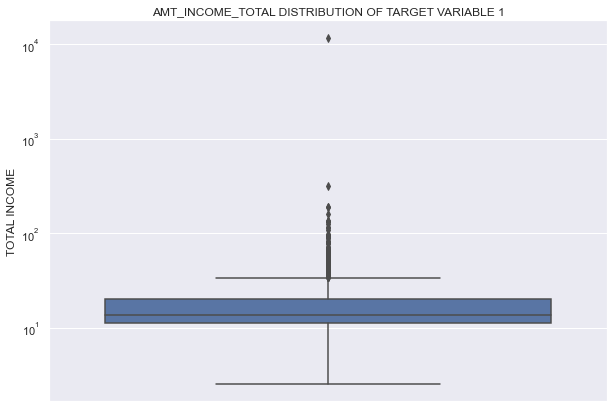

In [473]:
#Distribution of "AMT_INCOME_TOTAL" of variable 1
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target1.AMT_INCOME_TOTAL)
plt.yscale('log')
plt.title('AMT_INCOME_TOTAL DISTRIBUTION OF TARGET VARIABLE 1')
plt.ylabel('TOTAL INCOME')
plt.show()

In [474]:
#printing the IQR of the "AMT_INCOME_TOTAL" of variable1 
print("The lower quartile is",np.percentile(df_by_target1.AMT_INCOME_TOTAL,25))
print("The median is",np.percentile(df_by_target1.AMT_INCOME_TOTAL,50))
print("The upper quartile is",np.percentile(df_by_target1.AMT_INCOME_TOTAL,75)) 


The lower quartile is 11.25
The median is 13.5
The upper quartile is 20.25


**Inferences Drawn:**
   * There are outliers in this column.
   * The first quartile is less wider as compared to the third quartile.
   * Most of the people have income in the third quartile.

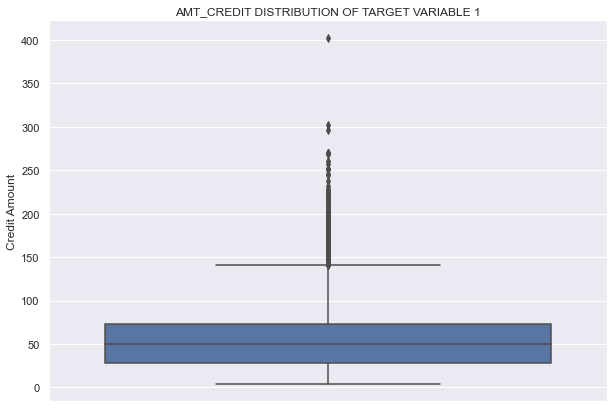

In [476]:
#Distribution of "AMT_CREDIT" of variable1
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target1.AMT_CREDIT)
plt.title('AMT_CREDIT DISTRIBUTION OF TARGET VARIABLE 1')
plt.ylabel("Credit Amount")
plt.show()

In [477]:
#printing the IQR of the "AMT_CREDIT" variable
print("The lower quartile is",np.percentile(df_by_target1.AMT_CREDIT,25))
print("The median is",np.percentile(df_by_target1.AMT_CREDIT,50))
print("The upper quartile is",np.percentile(df_by_target1.AMT_CREDIT,75)) 


The lower quartile is 28.44
The median is 49.752
The upper quartile is 73.33155


**Inferences Drawn:**
   * There are outliers in this column.
   * The third quartile is slightly wider than the first quartile.

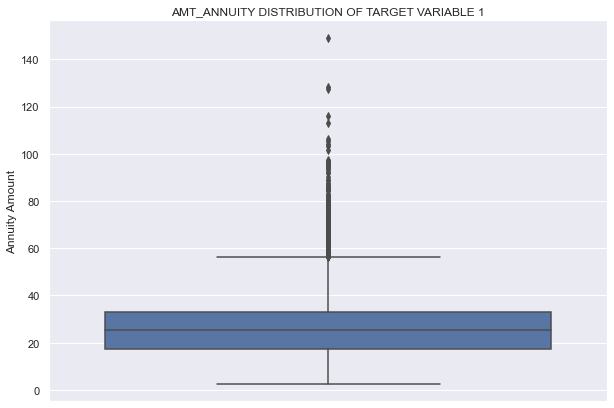

In [479]:
#Distribution of "AMT_ANNUITY" of variable1
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
sns.boxplot(y=df_by_target1.AMT_ANNUITY)
plt.title('AMT_ANNUITY DISTRIBUTION OF TARGET VARIABLE 1')
plt.ylabel("Annuity Amount")
plt.show()

In [480]:
#printing the IQR of the "AMT_ANNUITY" variable
print("The lower quartile is",np.percentile(df_by_target1.AMT_ANNUITY,25))
print("The median is",np.percentile(df_by_target1.AMT_ANNUITY,50))
print("The upper quartile is",np.percentile(df_by_target1.AMT_ANNUITY,75)) 

The lower quartile is 17.361
The median is 25.263
The upper quartile is 32.976


**Inferences Drawn:**
   * There are outliers in this column.
   * The first and the third quartile is quite similiar.

# Bivariate Analysis for Target Variable=0

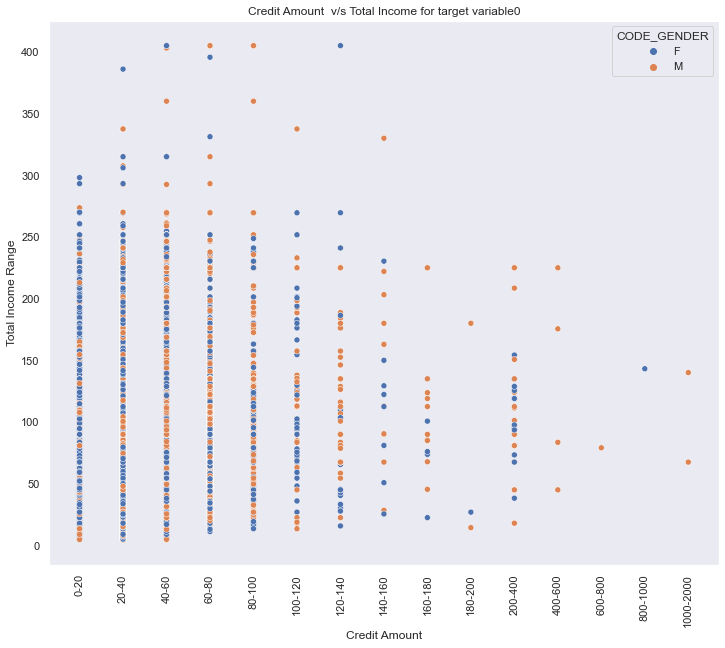

In [481]:
# Plotting a scatter PLot between Credit Amount of the loan v/s Totol Income Range for target variable=0

plt.figure(figsize=[12,10])
sns.set_style("dark")
sns.scatterplot(data=df_by_target0, x="AMT_INCOME_TOTAL_RANGE0",y= "AMT_CREDIT",hue="CODE_GENDER")
plt.title("Credit Amount  v/s Total Income for target variable0")
plt.ylabel("Total Income Range")
plt.xlabel("Credit Amount")
plt.xticks(rotation=90)
plt.show()

**Inferences Drawn:**
   * According to the scatter plot, it is evident that the people having income of 0-140 are actively taking loans be it big or small and also are able to pay the loan in time.
   * There are more females than males in the set of people who have been taking successful loans.
   * Percentage of males taking a higher amount of loan(>300) is almost equal to the percentage of women taking the same amount of loan.

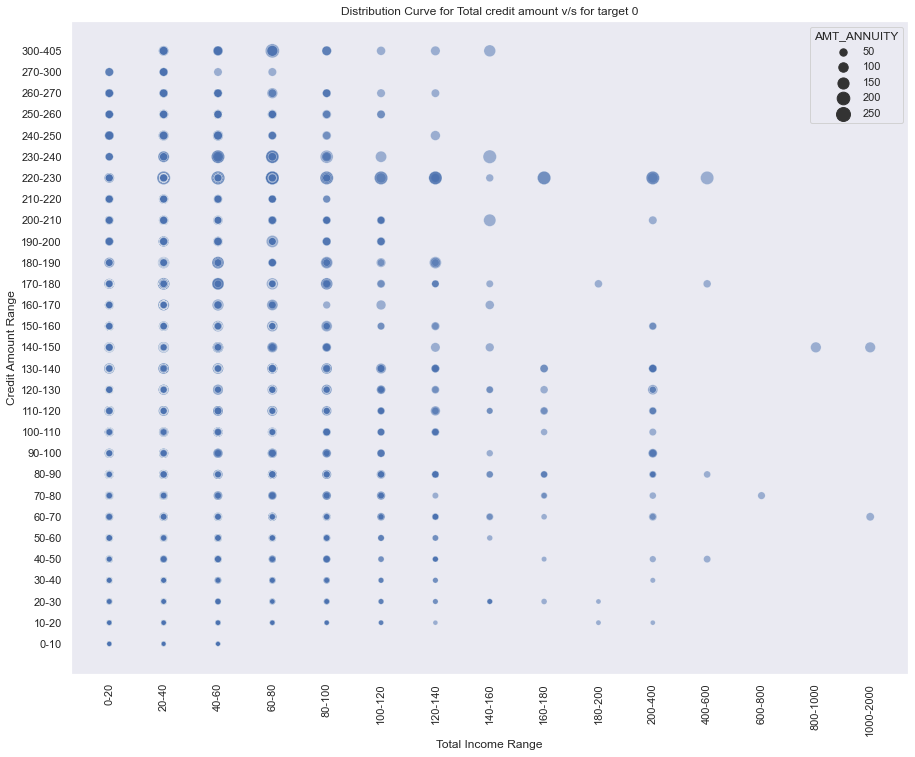

In [289]:
# PLotting TotalCredit Range v/s Income range for Target Variable 0 using Annuity Amount
plt.figure(figsize=(15,12))
sns.scatterplot(data=df_by_target0,y="AMT_CREDIT_RANGE0",x="AMT_INCOME_TOTAL_RANGE0",size="AMT_ANNUITY",
                sizes=(20,200),alpha=0.5,legend="brief")
plt.title("Distribution Curve for Total credit amount v/s for target 0")
plt.xlabel("Total Income Range")
plt.ylabel("Credit Amount Range")
plt.xticks(rotation=90) 
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

**Inferences Drawn:**
   * All income people having credit amount less than 50 are having small annuity amount.
   * Higher Annuity values can be seen in the credit amount range of 220-240 in all the income range brackets.
   * There are moderate annuity values in the credit range of 170-190 in the income amount range of 40-60 and 80-100.

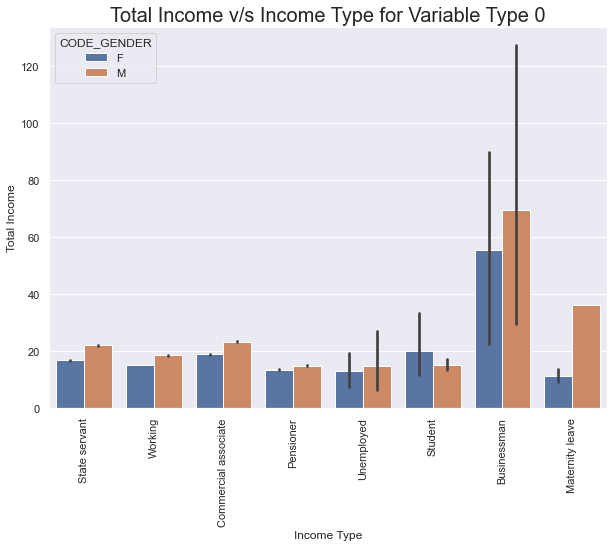

In [329]:
#Plotting bar plot for Total Income v/s Income Type for Target Variable 0
plt.figure(figsize=[10,7])
sns.set_theme(style="darkgrid")
sns.barplot(data=df_by_target0,x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL",hue="CODE_GENDER")
plt.title("Total Income v/s Income Type for Variable Type 0",fontsize=20)
plt.xlabel("Income Type")
plt.ylabel("Total Income")
plt.xticks(rotation=90)
plt.show()

**A bar plot shows only the mean(default) or other estimator value. So the Y- Axis isn't the count of the people in the respective Income type brackets. It just represents an estimate of central tendency for a numeric variable.**

**Inferences Drawn:**
   * Highest Income is there in the the type "Businessman"

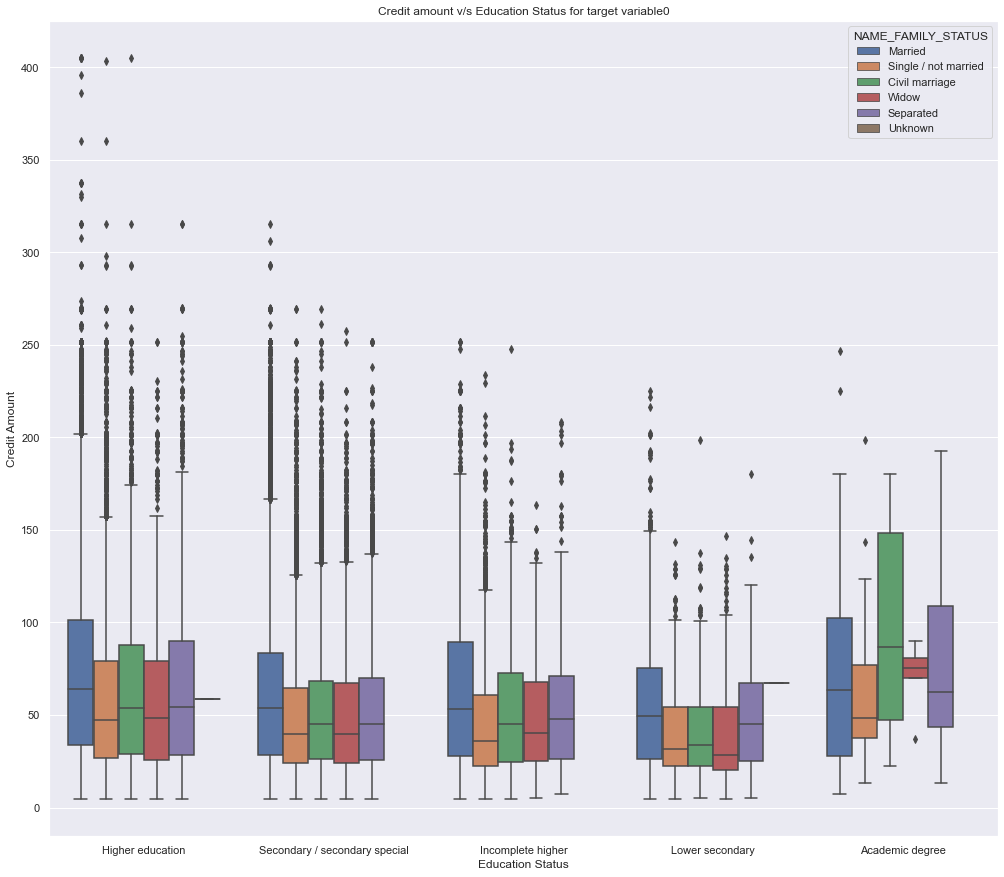

In [482]:
# Plotting a Box plot for Credit amount for target variable=0

plt.figure(figsize=(17,15))
sns.set_style("darkgrid")
plt.title('Credit amount v/s Education Status for target variable0')
sns.boxplot(data =df_by_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.xlabel("Education Status")
plt.ylabel("Credit Amount")
plt.show()

**Inferences Drawn:**
   * Married people in any type of education status has the maximum credit amount.
   * Family status of "Civil marriage" for "Academic degree" is having most of the credit amount in the third quartile.
   * Family status of "Married", "Civil Marriage" and "Seperated" have higher amount of credits than any other set of people in that particular education status bracket.
   * Fmaily Status of "Married", "Single/Not Married", "Civil Marriage" are having high oultiers which means that the the credit amount is high in "Higher Education"
   * There are no extreme values in family status of "Civil Marriage" and "Seperated" in the Education status of "Academic Degree".

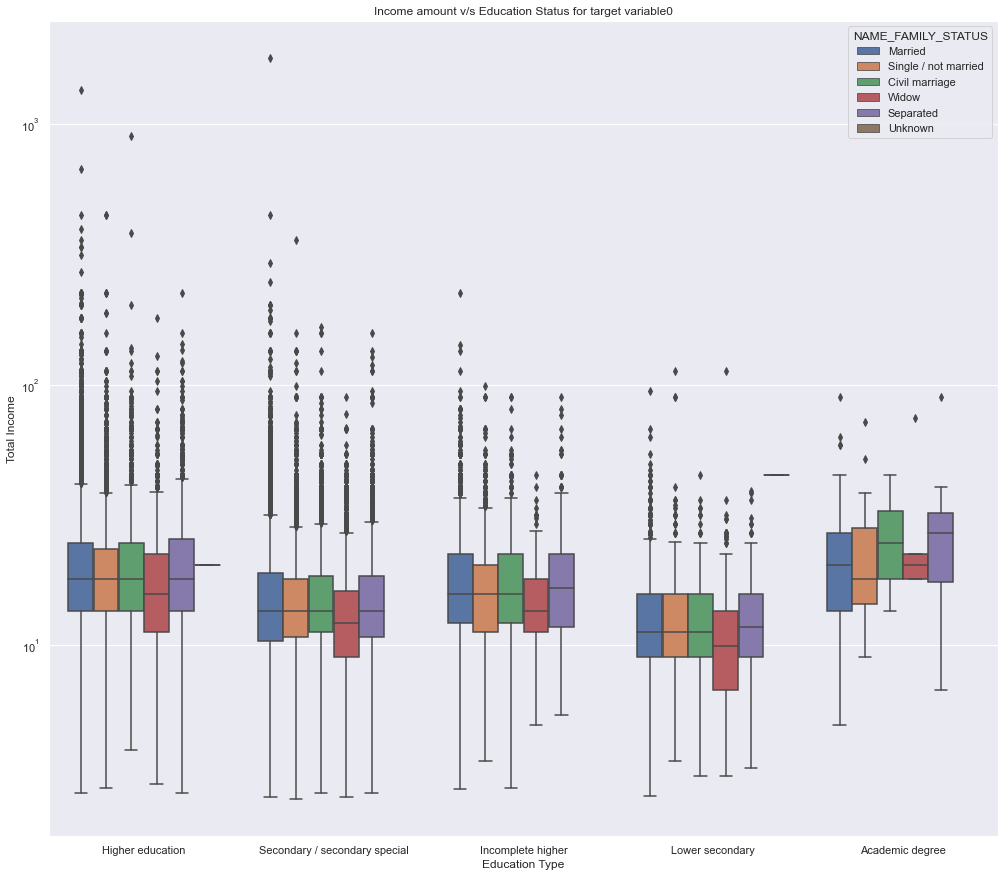

In [483]:
# Plotting a box plot for Total Income amount in log scale for target variable=0

plt.figure(figsize=(17,15))
sns.set_style("darkgrid")
plt.yscale('log')
plt.title('Income amount v/s Education Status for target variable0')
sns.boxplot(data =df_by_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.ylabel("Total Income")
plt.xlabel("Education Type")
plt.show()

**Inferences Drawn:**
   * Family status of "Married" having "Lower Secondary" education, "Single/Not Married" having "Secondary/Secondary Special" are having the lowest income.
   * Married people in "Higher Education" and "Secondary/Secondary Special" are having higher income in their respective Education Status brackets.

# Bivariate Analysis for Target Variable=1

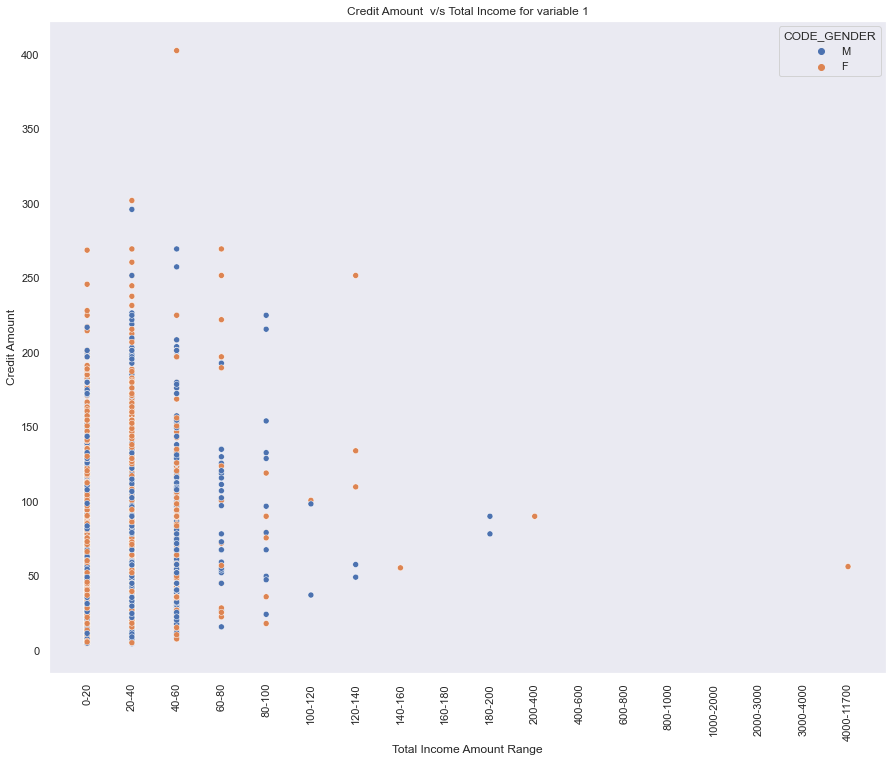

In [484]:
# Plotting a scatter PLot between Credit AMount of the loan v/s Total Income Range for target variable=1

plt.figure(figsize=[15,12])
sns.set_style("dark")
sns.scatterplot(data=df_by_target1, x="AMT_INCOME_TOTAL_RANGE1",y= "AMT_CREDIT",hue="CODE_GENDER")
plt.title("Credit Amount  v/s Total Income for variable 1")
plt.xlabel("Total Income Amount Range")
plt.ylabel("Credit Amount")
plt.xticks(rotation=90)
plt.show()

**Inferences Drawn:**
   * There are less values in this category than the previous one(Target=0)
   * One major difference between the above plot vs that of target variable 0 is that the Total Income Amount is that majority of these people have low to moderate to high credit amount values till 300 in the Total Income Amount Range of 0-100.
   * Many people who have less Total Income lower than 40 are having loan amount of more than 150 which is the result of them not being able to pay the loan on time.

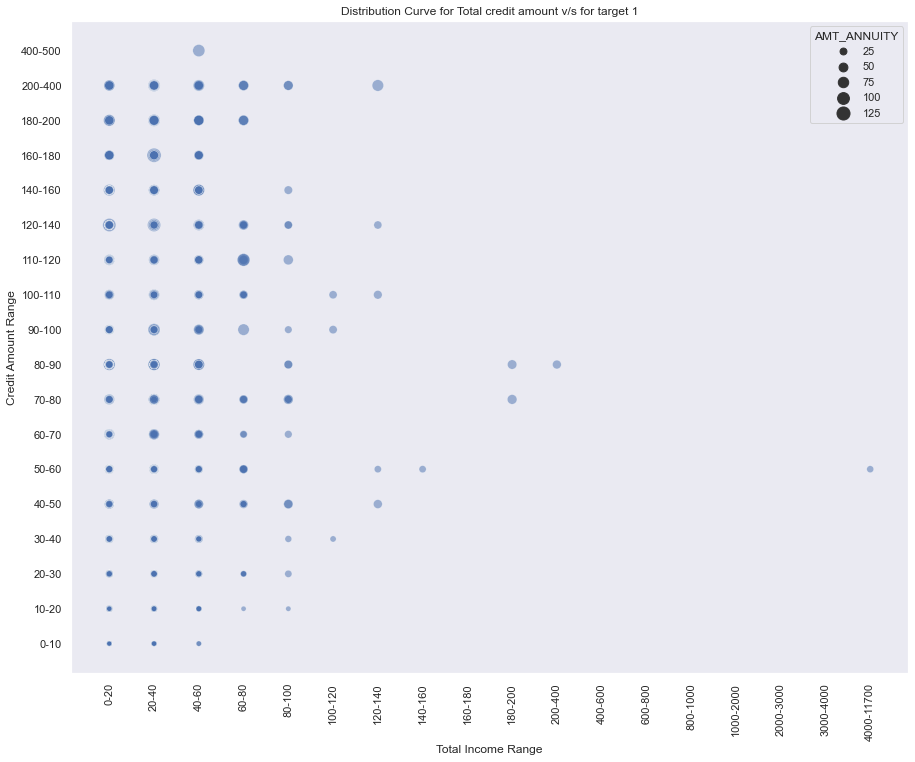

In [485]:
# PLotting TotalCredit Range v/s Income range for Target Variable 1 using Annuity Amount
plt.figure(figsize=(15,12))
sns.scatterplot(data=df_by_target1,y="AMT_CREDIT_RANGE1",x="AMT_INCOME_TOTAL_RANGE1",size="AMT_ANNUITY",
                sizes=(20,200),alpha=0.5,legend="brief")
plt.title("Distribution Curve for Total credit amount v/s for target 1")
plt.xlabel("Total Income Range")
plt.ylabel("Credit Amount Range")
plt.xticks(rotation=90) 
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()

**Inferences Drawn:**
   * Like in the previous graph, the Total Income people having less than 80 salary are having moderate annuity amount .
   * People having Total Income Range of 0-60 with credit amount range of 120-180 have higher annuity values which is the reason for their late payments.

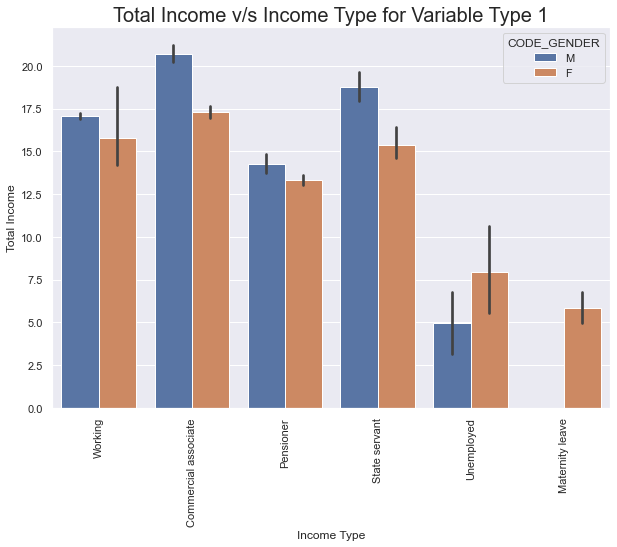

In [489]:
#Plotting bar plot for Total Income v/s Income Type for Target Variable 1
plt.figure(figsize=[10,7])
sns.set_theme(style="darkgrid")
sns.barplot(data=df_by_target1,x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL",hue="CODE_GENDER")
plt.title("Total Income v/s Income Type for Variable Type 1",fontsize=20)
plt.xlabel("Income Type")
plt.ylabel("Total Income")
plt.xticks(rotation=90)
plt.show()

**Insights Drawn:**
   * "Maternity Leaves" Income type doesn't have any male category.
   * Income type of "Unemployed" have the lowest income in this category of late payments.

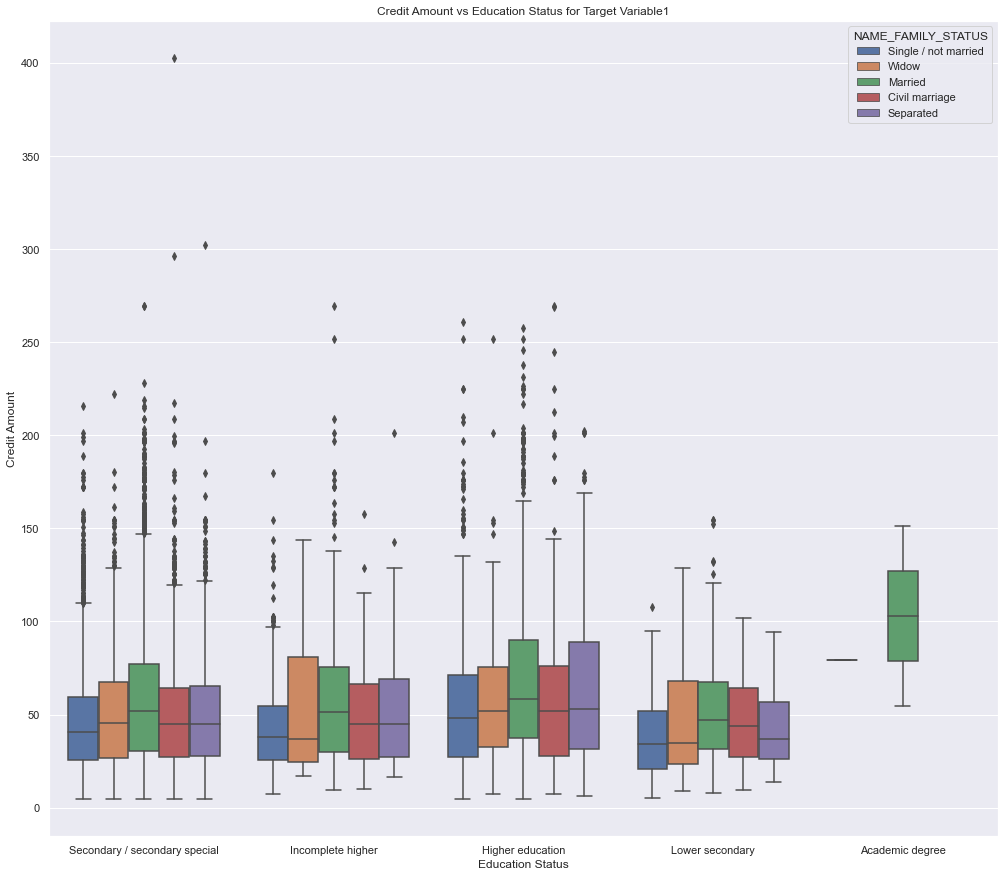

In [490]:
# Plotting a Box plot for Credit amount for target variable =1

plt.figure(figsize=(17,15))
sns.set_style("darkgrid")
plt.title('Credit Amount vs Education Status for Target Variable1')
sns.boxplot(data =df_by_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.xlabel("Education Status")
plt.ylabel("Credit Amount")
plt.show()

**Inferences Drawn:**
   * All Family status people having Education Status of "Higher Education" are having considerably higher Credit Amount value.
   * People having Family Status of "Civil Marriage" in "Higher Education" and "Secondary/Secondary Special" are having many outliers and are high in both of the groups.
   * People in "Incomplete Higher" Education are having Credit Amount greater than 90.
   * The same goes with "Lower Secondary" Education people as well.

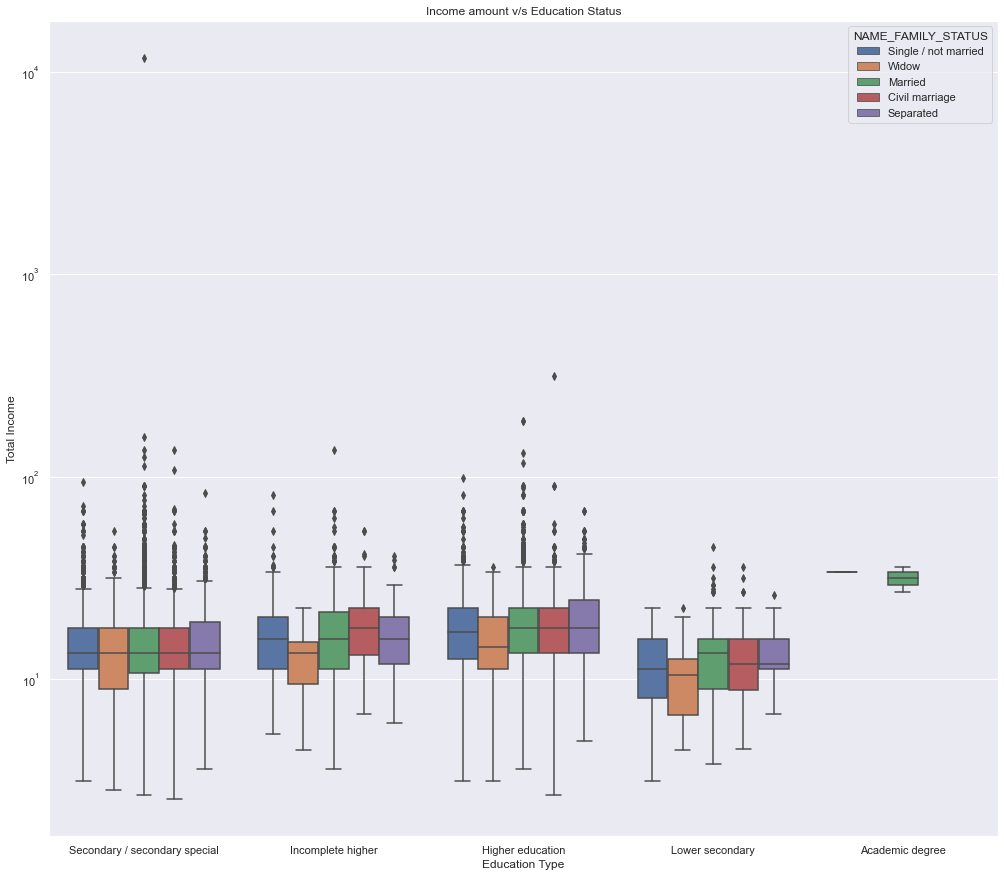

In [491]:
# Plotting a box plot for Total Income amount in log scale

plt.figure(figsize=(17,15))
sns.set_style("darkgrid")
plt.yscale('log')
plt.title('Income amount v/s Education Status')
sns.boxplot(data =df_by_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.ylabel("Total Income")
plt.xlabel("Education Type")
plt.show()


**Inference Drawn:**
   * The "Incomplete Higher" Education Status people are having a Total income lesser than 50 but higher credit amount resulting in being a defaulter.
   * People having a Family Status of "Widow" are having a small lower quartile range. 25% of them are having Total Income of less than 10 in most cases.

# Multivariate Analysis of Target Variable=0

In [502]:
# Finding correlation for the numerical columns for of target variable=0

corr_0=df_by_target0.iloc[0:,2:].corr(method='spearman')
corr_0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485689,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321
AMT_CREDIT,0.002315,0.416017,1.000000,0.831885,0.053570,0.057151,0.017986,-0.009416,0.001982,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972
AMT_ANNUITY,0.024767,0.485689,0.831885,1.000000,0.058591,-0.011740,-0.030195,-0.037717,-0.016570,0.054189,0.035819,0.075773,0.073042,-0.004962,0.009718,0.019451
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,1.000000,0.030730,-0.003651,0.036684,0.010463,0.128237,-0.019922,0.029206,0.051195,-0.045545,-0.029350,-0.005476
DAYS_BIRTH,-0.375639,-0.093515,0.057151,-0.011740,0.030730,1.000000,0.583711,0.298130,0.261979,-0.098444,-0.066377,-0.096421,-0.070065,-0.180952,-0.239113,-0.156588
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,-0.003651,0.583711,1.000000,0.201306,0.259900,-0.084417,-0.071272,-0.137882,-0.112790,-0.145590,-0.262852,-0.198795
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,0.036684,0.298130,0.201306,1.000000,0.094153,0.008471,-0.025938,-0.032723,-0.024163,-0.055307,-0.085865,-0.062442
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016570,0.010463,0.261979,0.259900,0.094153,1.000000,-0.039755,-0.035392,-0.049195,-0.034776,-0.077360,-0.101050,-0.062976
HOUR_APPR_PROCESS_START,0.001725,0.102384,0.051370,0.054189,0.128237,-0.098444,-0.084417,0.008471,-0.039755,1.000000,0.052053,0.071837,0.058612,0.019765,0.020448,0.012789


**In this we use Spearman method of correlation because the variables are not normally distributed. Hence Pearson's method of correlation won't be desirable.**

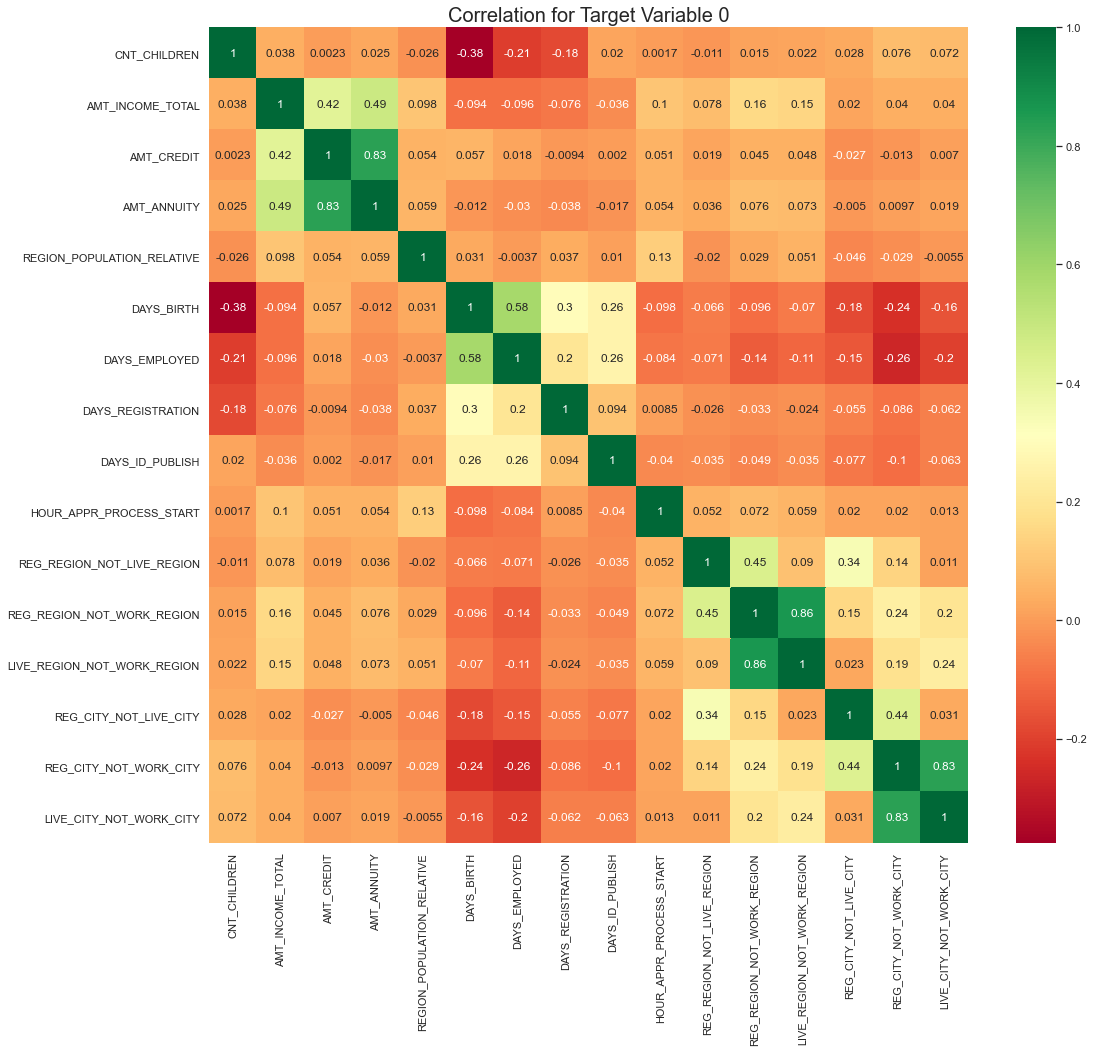

In [499]:
#plotting the heatmap of the correlation of target variable=0
plt.figure(figsize=[17,15])
sns.heatmap(corr_0,annot=True,cmap="RdYlGn")
plt.title("Correlation for Target Variable 0",fontsize=20)
plt.show()


**Inferences Drawn:**
   * Income amount is inversely proportional to the number of children client have, which goes to say that more income then the children count will be less and vice-versa.
   * Similiarly, Credit Amount is inversely proportional to the number of children client have,which goes to say that more Credit amount then the children count will be less.
   * Credit Amount is inversely proportional to the date of birth which goes to say that the Credit Amount is higher for lower age and vice-versa.
   * The income is higher in densely populated area.
   * Credit amount is higher as well in highly populated area.
   * These segment of people have less children in highly populated area.

# Multivariate Analysis of Target Variable=1

In [501]:
# Finding correlation for the numerical columns target =1
corr_1=df_by_target1.iloc[0:,2:].corr(method='spearman')
corr_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.051463,0.007238,-0.036127,-0.036671,0.005929,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.039919,0.155216,0.082434,0.017099,0.053780,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.023297,0.030483,-0.003396,-0.035900,0.014472,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,1.000000,0.046398,0.020003,0.034315,0.023668,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447
DAYS_BIRTH,-0.267862,0.007238,0.155216,0.030483,0.046398,1.000000,0.466526,0.232940,0.251626,-0.065810,-0.055835,-0.064540,-0.039911,-0.165372,-0.203415,-0.108966
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.020003,0.466526,1.000000,0.148988,0.209881,-0.043106,-0.075600,-0.118454,-0.090170,-0.144260,-0.249624,-0.167530
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.034315,0.232940,0.148988,1.000000,0.095750,0.032019,-0.015237,-0.014323,-0.010359,-0.033891,-0.071324,-0.052747
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.023668,0.251626,0.209881,0.095750,1.000000,-0.026347,-0.032654,-0.032845,-0.019967,-0.068605,-0.070867,-0.031407
HOUR_APPR_PROCESS_START,-0.022469,0.088174,0.028537,0.032083,0.105989,-0.065810,-0.043106,0.032019,-0.026347,1.000000,0.048070,0.065472,0.052126,0.007850,0.019658,0.014637


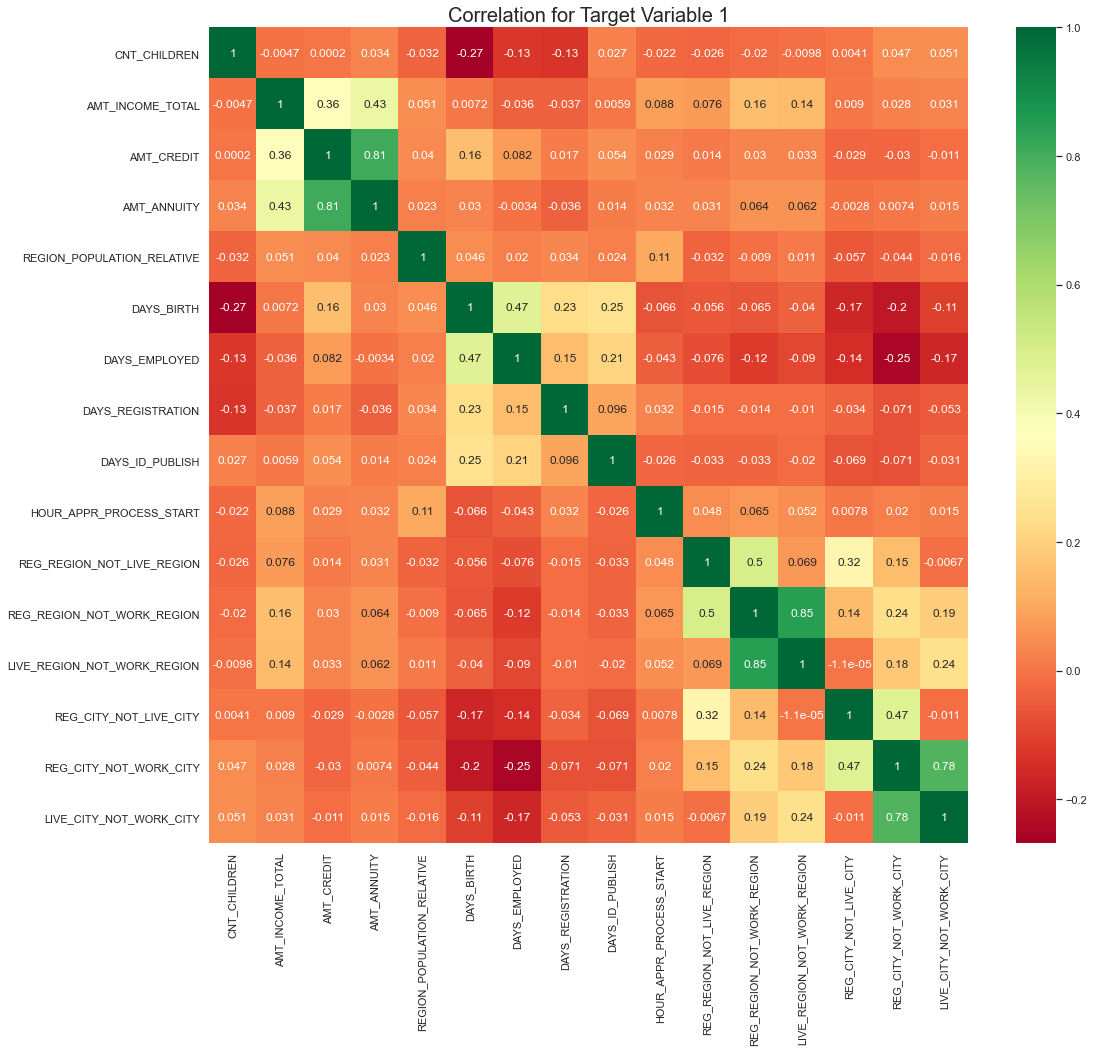

In [500]:
#plotting the heatmap of the correlation of target variable=1
plt.figure(figsize=[17,15])
sns.heatmap(corr_1,annot=True,cmap="RdYlGn")
plt.title("Correlation for Target Variable 1",fontsize=20)
plt.show()


**Inferences Drawn:**
   * Those client's whose permanent address does not match with the contact address are having less children and vice-versa.
   * Those client's whose permanent does not match work address are having less children and vice-versa

# Data Inspection of Previous Application

In [503]:
df_old=pd.read_csv(r"D:\Upgrad Data Science PGDDS\Python\EDA Case Study\previous_application.csv")

In [504]:
#printing first 5 rows of the dataframe to get an idea of values of each variable
df_old.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,...,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,...,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,...,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,...,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,...,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
#checking the unqiue values in all the columns
df_old.nunique(axis=0)

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [506]:
# Check the number of rows and columns in the dataframe
df_old.shape

(1670214, 37)

# Data Cleaning

In [507]:
# Cleaning the missing data
# Making a list of all the null values columns having more than 40%

nullcolumns_old=df_old.isnull().sum()
nullcolumns_old=nullcolumns_old[nullcolumns_old.values>(0.4*len(nullcolumns_old))]
len(nullcolumns_old)

15

In [508]:
# Removing these 15 columns
nullcolumns_old = list(nullcolumns_old[nullcolumns_old.values>=0.4].index)
df_old.drop(labels=nullcolumns_old,axis=1,inplace=True)

In [509]:
#Sanity Check: Checking the shape of the cleaned columns
df.shape

(307511, 28)

In [510]:
# Checking the columns having null values

df_old.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [511]:
#checking for any unique values in the cleaned data
rows_old=df_old.iloc[1:29].values.ravel()
unique_values_old=pd.unique(rows_old)
print(unique_values_old)

[2802425 108129 'Cash loans' 607500.0 679671.0 'THURSDAY' 11 'Y' 1 'XNA'
 'Approved' -164 'XAP' 'Repeater' 'Cash' 'x-sell' 'Contact center' -1
 'low_action' 2523466 122040 112500.0 136444.5 'TUESDAY' -301
 'Cash through the bank' 'Credit and cash offices' 'high' 2819243 176158
 450000.0 470790.0 'MONDAY' 7 -512 'middle' 1784265 202054 337500.0
 404055.0 9 'Repairs' 'Refused' -781 'HC' 'walk-in' 1383531 199383
 315000.0 340573.5 'SATURDAY' 8 'Everyday expenses' -684 'low_normal'
 2315218 175704 0.0 'Canceled' -14 1656711 296299 -21 2367563 342292 15
 -386 2579447 334349 -57 1715995 447712 270000.0 335754.0 'FRIDAY' -735
 2257824 161140 211500.0 246397.5 10 -815 2330894 258628 148500.0 174361.5
 -860 1397919 321676 'Consumer loans' 53779.5 57564.0 'SUNDAY' -408 'New'
 'Consumer Electronics' 'POS' 'Country-wide' 200 'Consumer electronics'
 2273188 270658 26550.0 27252.0 -726 'Construction Materials' 'Stone' 83
 1232483 151612 126490.5 119853.0 -699 'Auto Accessories'
 'Regional / Local' 1

###### We see that there is a XNA and XAP Values in the dataframe which was not counted as null. These stand for not available. Hence we need to deal with it as well.

In [512]:
#findng which columns has "XNA" and "XAP" values in them
df_old.columns[df_old.isin(['XNA','XAP']).any()]

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP'],
      dtype='object')

In [513]:
#checking the columns for those values
column_values1 = df_old[['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP']].values.ravel()

df_old[(df_old == 'XNA')].count()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                 346
AMT_APPLICATION                      0
AMT_CREDIT                           0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE          677918
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE               627384
CODE_REJECT_REASON                5244
NAME_CLIENT_TYPE                  1941
NAME_GOODS_CATEGORY             950809
NAME_PORTFOLIO                  372230
NAME_PRODUCT_TYPE              1063666
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY            855720
NAME_YIELD_GROUP                517215
dtype: int64

In [515]:
#checking the values of XAP
df_old[(df_old == 'XAP')].count()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_APPLICATION                      0
AMT_CREDIT                           0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE          922661
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON             1353093
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY                 0
NAME_YIELD_GROUP                     0
dtype: int64

**Since we are intersted in using the variable "NAME_CASH_LOAN_PURPOSE" for our analysis, we see that the count of "XNA" and "XAP" values are too high and it might create hinderance in our analysis. Hence we will drop the values of those in that column.**

In [516]:
# Merging the Application Data with previous_application

final_df=pd.merge(left=df,right=df_old,how='inner',on='SK_ID_CURR',suffixes='_x')

In [517]:
# Removing the column
final_df=final_df.drop(final_df[final_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
final_df=final_df.drop(final_df[final_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [518]:
# Removing unwanted columns for analysis

final_df.drop(['WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_STARTx',
              'HOUR_APPR_PROCESS_STARTx', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

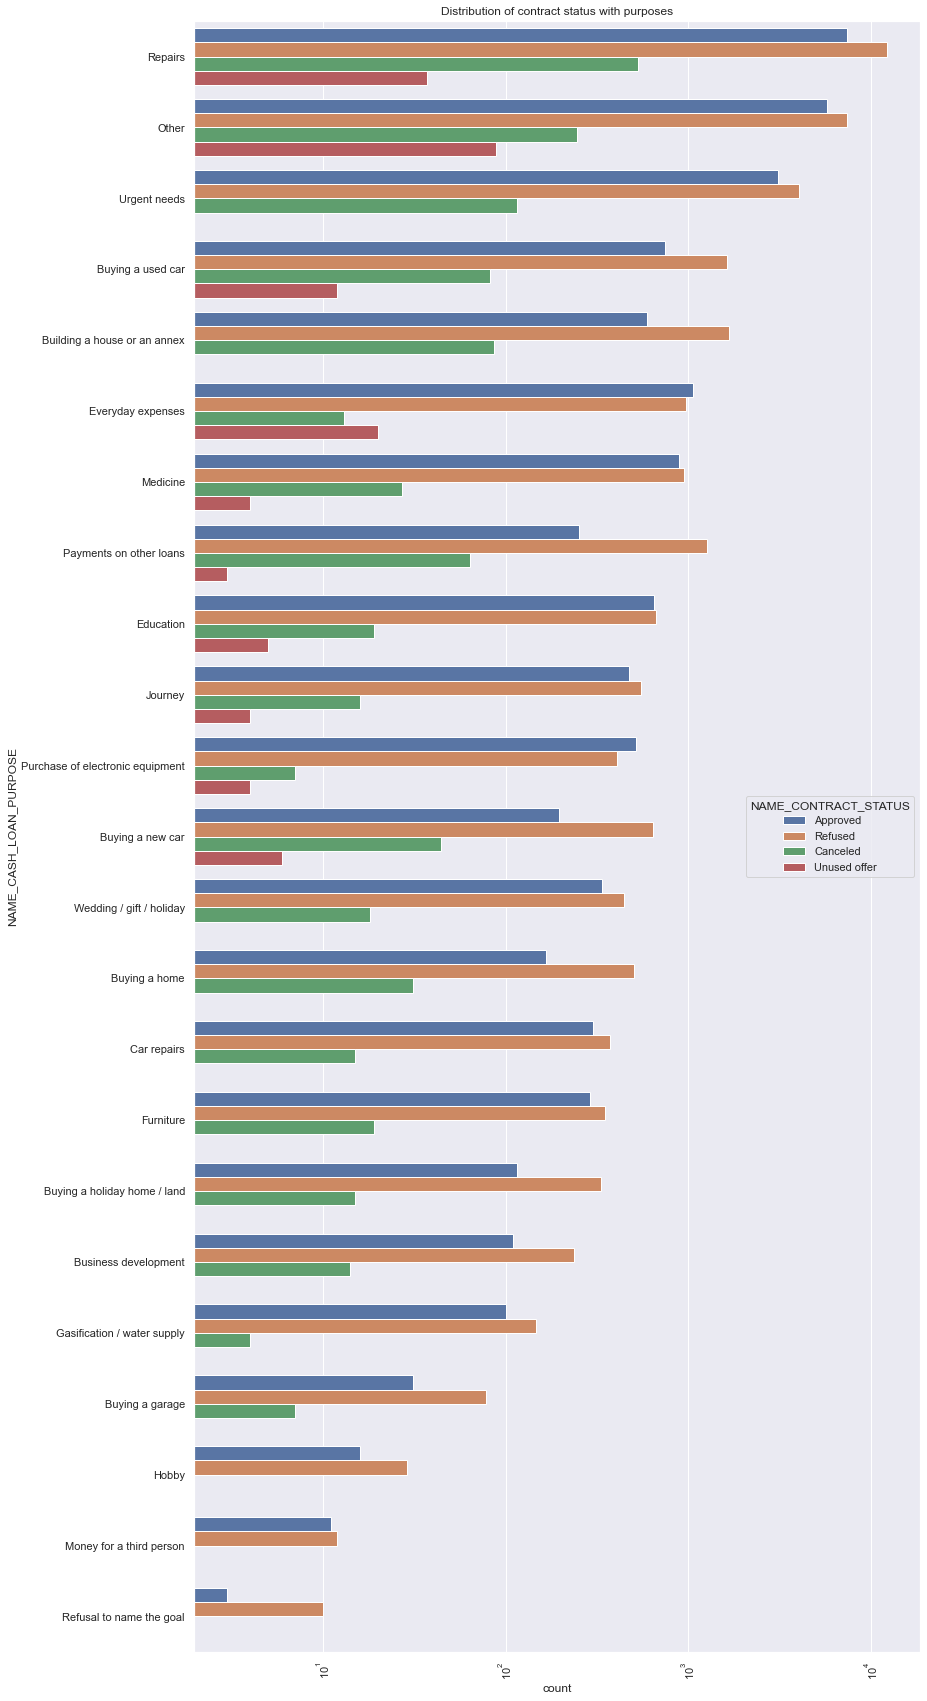

In [519]:
# Distribution of Contract Status with Purpose using countplot in the order of decreasing counts on a log scale
plt.figure(figsize=(13,30))
sns.set_style('darkgrid')
plt.xscale('log')
plt.xticks(rotation=90)
plt.title('Distribution of contract status with purposes')
sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE',order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS')
plt.show()

**Inferences Drawn:**
   * The bank has rejected loans frequently  of people from 'repairs'.
   * Reasons like "Everyday Expenses","Purchase of Electronic Equipement" have more approvals than rejections.
   * There is a high rate of cancellation in "Repairs" as well.
   * For the field education it seems that there is an equal number of approves and rejection
   * "Payment of other loans", "Buying a new car" and "Buying a new home" are having higher rejection than approvals.

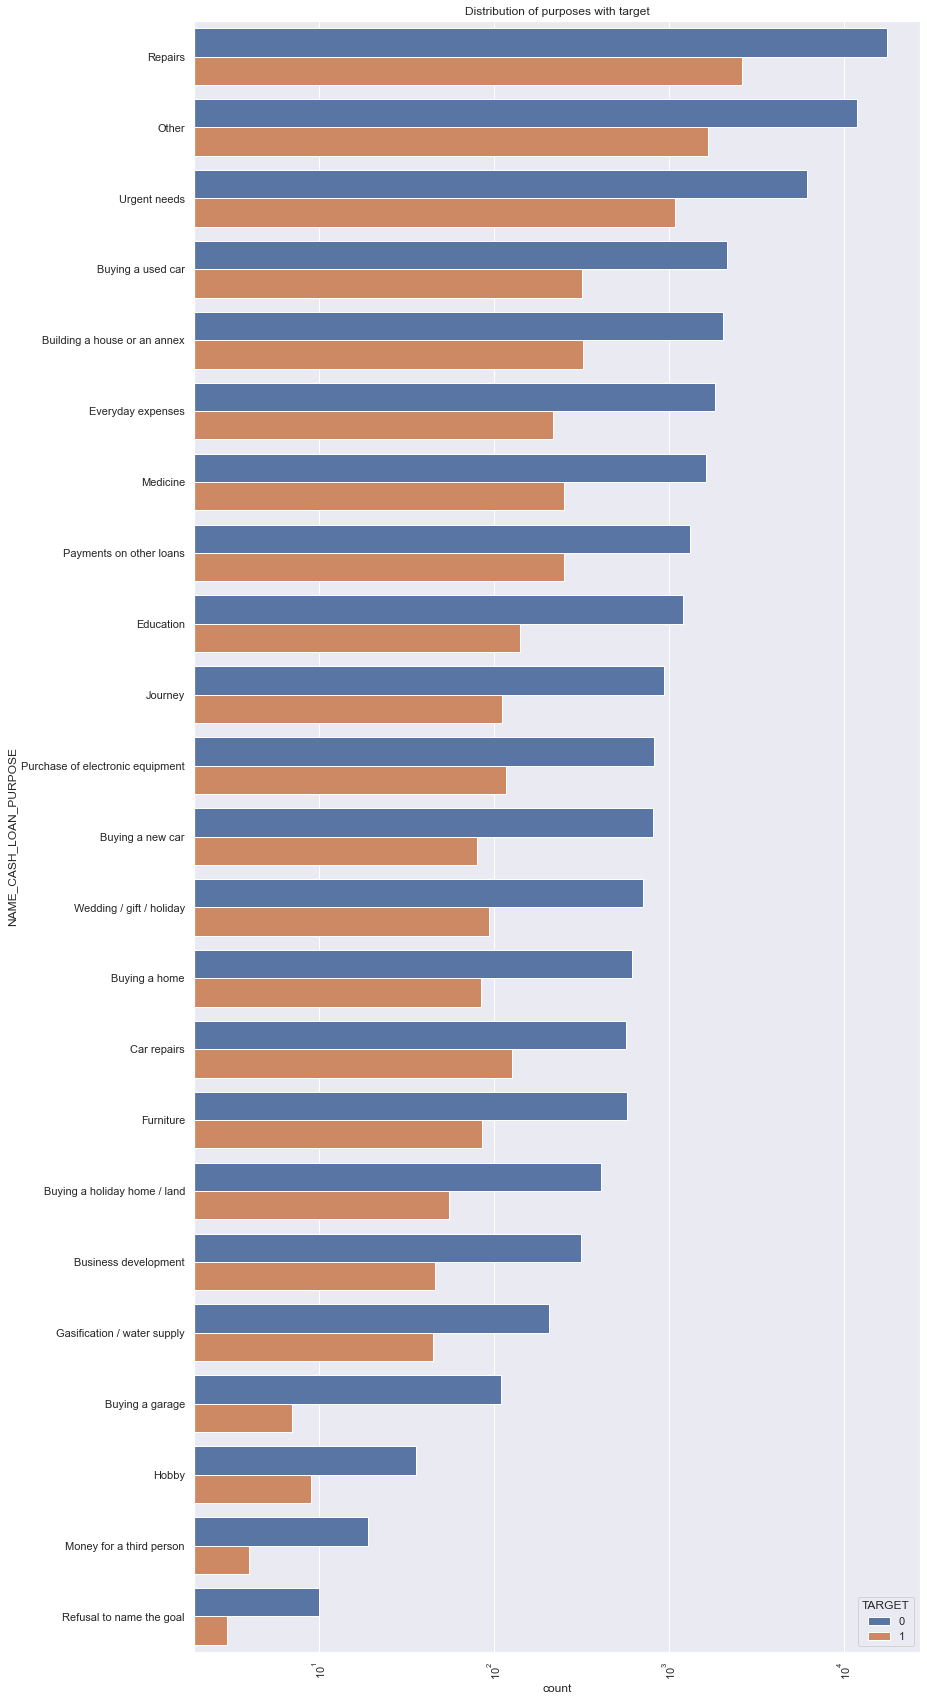

In [520]:
# Distribution of contract status with the help of countplot on a log scale in the order of decreasing counts

plt.figure(figsize=(13,30))
sns.set_style('darkgrid')
plt.xscale('log')
plt.xticks(rotation=90)
plt.title('Distribution of purposes with target')
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE',order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                   hue = 'TARGET')

**Inferences Drawn:**
   * Loan Purposes like "Repairs" are having the max trouble in timely payments.
   * People having no issues in payment is more than the people having issues in all the Loan Purposes.
   * Purposes like "Buying a Garage", "Buying a home/Land", "Buying a new Car", "Education", "Journey", "Everyday Expenses" have a better successful payment rate than the delayed payments rate. **So we can focus at these segments where there are less payment issues.**

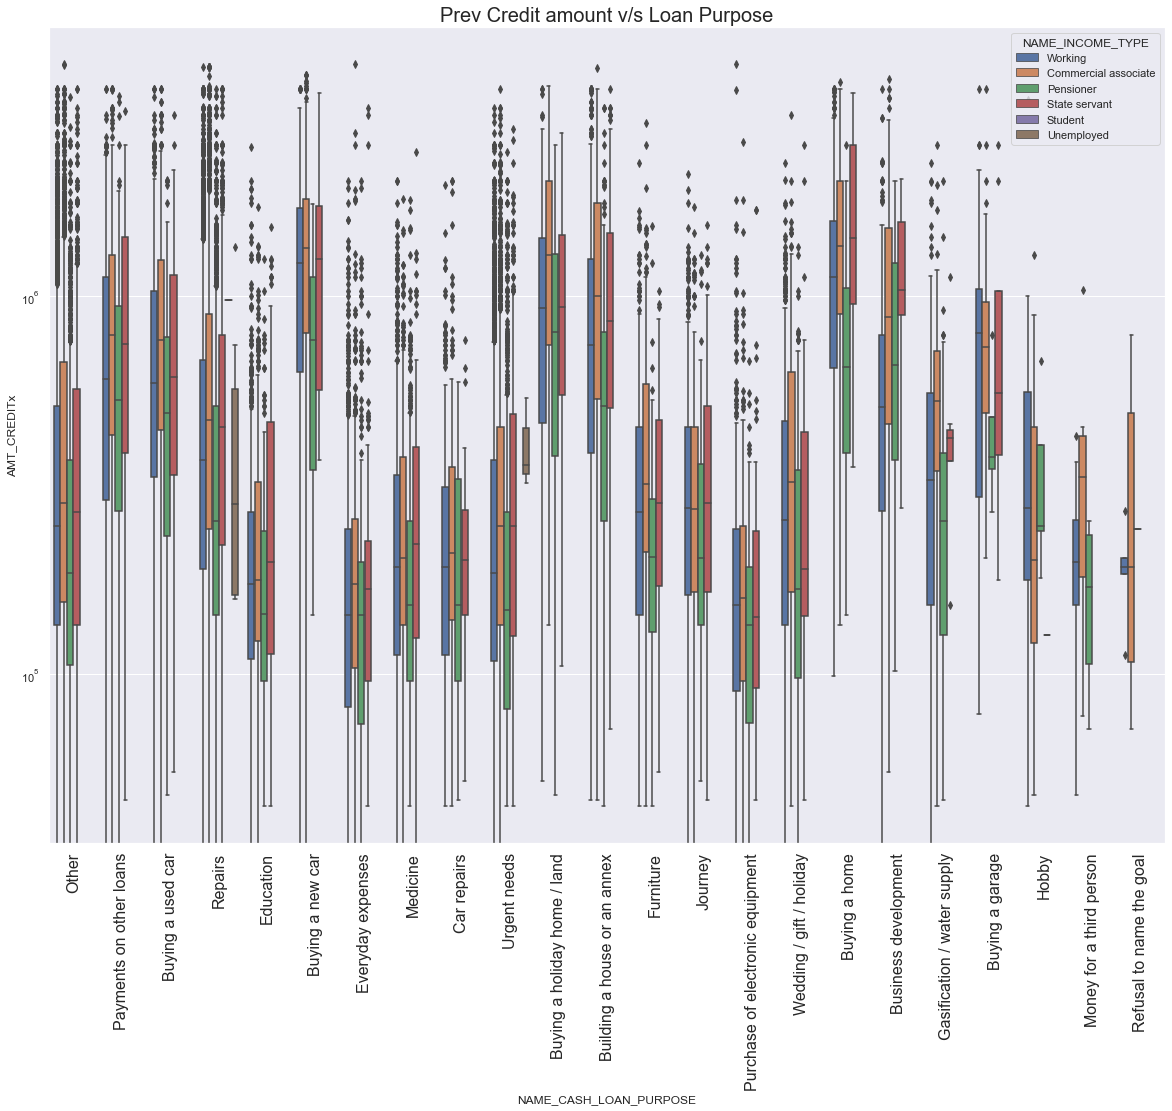

In [521]:
# Box plotting for Credit amount on log scale

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount v/s Loan Purpose',fontsize=20)
sns.boxplot(data =final_df, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDITx',hue='NAME_INCOME_TYPE')
plt.xticks(fontsize=16)
plt.show()

**Inferences Drawn:**
   * The credit amount of Loan purposes like 'Buying a home','Buying a holiday home/ land','Buying a new car' and'Building a house or annex' is higher.
   * Money for third person or money for a Hobby is having less credits.
   * Tax for State Servants are higher as they have a higher upper quartile, and outliers in all the segments.

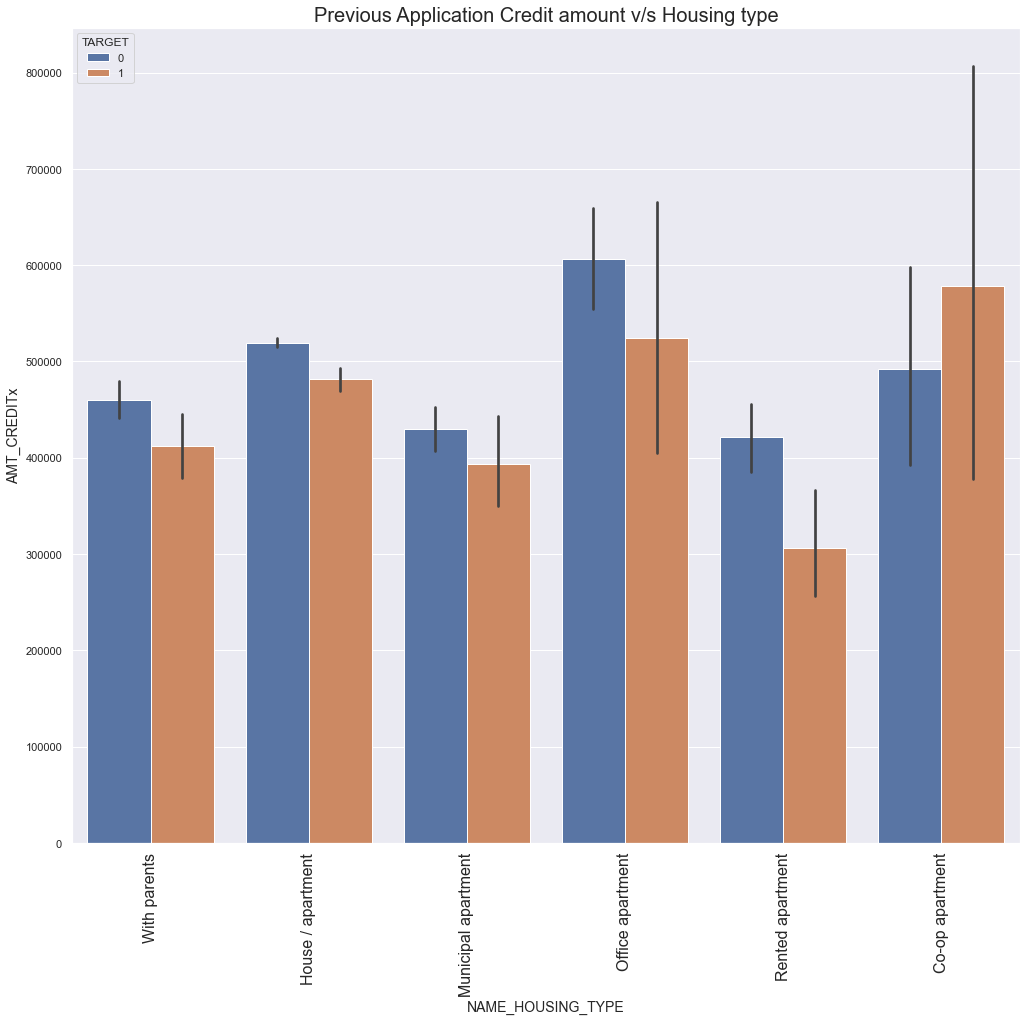

In [522]:
# Plotting a boxplot for Credit amount prev v/s Housing type

plt.figure(figsize=(17,15))
plt.xticks(rotation=90)
plt.title('Previous Application Credit amount v/s Housing type',fontsize=20)
plt.xlabel("Housing Type",fontsize=14)
plt.xticks(fontsize=16)
plt.ylabel("Credits Amount ",fontsize=14)
sns.barplot(data =final_df,x='NAME_HOUSING_TYPE', y='AMT_CREDITx',hue='TARGET')
plt.show()

**Inferences Drawn:**
   * We see that office apartment has higher credit for Target Variable 0 and Co-op Apartment has highest credit for Target Variable 1.
   * Hence the banks should not approve loans from housing type of "CO-op Apartment".
   * Banks should approve loans from housing type of "With Parents", "House/Apartment,"Municipal Apartment", "Office Apartment", "Rented Apartment" in order to not get into losses.

# CONCLUSION

* Banks should focus more on contract type 'Student' and 'Businessman' with housing type other than 'Co-op apartment' for successful payments.

* Banks should focus less on income type Working as they are having most number of unsuccessful payments.

* Loan Purposes like "Repair" is having higher number of unsuccessful payments on time.

* Get as much as clients from housing type "With parents" as they are having least number of unsuccessful payments.

* Bank should not approve loans from females having a salary of 200K-300K as the bank.

# THANK YOU